# IMPORTS:

In [ ]:
!pip install dalex -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1045995 sha256=60ccd97bedb7262cfc4e9624eb8bf377145a5d9fd3fb9ecffe8c5c5ee1dc4308
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=cab517d86df498151a74e41ae77edee45d34cbca3e3afb7689cf709f748d05af
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#imports necesarios
import pandas as pd
import numpy as np
from sklearn import svm
from scipy.stats import ttest_rel
from sklearn.svm import LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RepeatedKFold
from sklearn.inspection import permutation_importance
from scipy.io.arff import loadarff
import statsmodels.api as sm
from sklearn.utils import resample
import dalex as dx
import seaborn as sns

In [ ]:
# Función para evaluar el signo de los valores
def evaluar_valor(valor):
    if valor >= 0:
        return "Positivo"
    else:
        return "Negativo"

In [ ]:
# Crear las columnas del MultiIndex
columns = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

# **Dataset preprocesado:**

In [ ]:
#carga del dataset
data=loadarff("/content/drive/MyDrive/TFM/china.arff")
df = pd.DataFrame(data[0])

In [ ]:
df.head(20) #comprobar el dataframe

,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort
0,1.0,1587.0,774.0,260.0,340.0,128.0,0.0,1502.0,0.0,0.0,4.7,5.0,4.7,5.0,4.0,0.0,4.0,7490.0,7490.0
1,2.0,260.0,9.0,4.0,3.0,193.0,41.0,51.0,138.0,61.0,16.0,16.6,16.0,16.6,2.0,0.0,17.0,4150.0,4150.0
2,3.0,152.0,25.0,33.0,28.0,42.0,35.0,163.0,0.0,0.0,4.4,4.1,4.4,4.1,1.0,0.0,9.0,668.0,668.0
3,4.0,252.0,151.0,28.0,8.0,39.0,0.0,69.0,153.0,4.0,12.8,14.3,15.5,17.3,1.0,0.0,4.0,3901.0,3238.0
4,5.0,292.0,93.0,0.0,194.0,20.0,0.0,0.0,307.0,0.0,10.3,9.8,12.4,11.7,1.0,0.0,13.0,3607.0,2994.0
5,6.0,83.0,63.0,0.0,24.0,0.0,0.0,0.0,87.0,0.0,16.1,15.3,19.3,18.5,1.0,0.0,4.0,1606.0,1333.0
6,7.0,79.0,24.0,0.0,23.0,30.0,0.0,0.0,77.0,0.0,20.3,20.9,24.5,25.1,1.0,0.0,6.0,1936.0,1607.0
7,8.0,97.0,0.0,108.0,7.0,0.0,5.0,120.0,0.0,0.0,11.9,9.7,11.9,9.7,2.0,0.0,7.0,1158.0,1158.0
8,9.0,116.0,0.0,23.0,58.0,14.0,20.0,81.0,34.0,0.0,10.7,10.8,12.9,13.0,1.0,0.0,6.0,1498.0,1243.0
9,10.0,52.0,39.0,7.0,0.0,0.0,0.0,0.0,46.0,0.0,64.8,73.3,78.1,88.3,1.0,0.0,7.0,4063.0,3372.0


In [ ]:
#comprobar si existen valores null o ?
print("¿Existen valores nulos?:", df.isnull().values.any())
print("¿Existen valores con '?' ?:", (df == '?').values.any())

¿Existen valores nulos?: False
¿Existen valores con '?' ?: False


In [ ]:
df.describe()

,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.0,499.000000,499.000000,499.000000
mean,250.000000,486.857715,167.098196,113.601202,61.601202,91.234469,24.234469,360.354709,85.062124,12.352705,11.770541,12.07976,13.269739,13.626253,1.458918,0.0,8.719238,4277.641283,3921.048096
std,144.193157,1059.171436,486.338575,221.274374,105.422840,210.270984,85.040996,829.842333,290.857039,124.224130,12.105649,12.81871,14.009840,14.843416,0.823729,0.0,7.347058,7071.248036,6480.855600
min,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.30000,0.400000,0.400000,1.000000,0.0,1.000000,31.000000,26.000000
25%,125.500000,100.500000,27.000000,13.000000,6.000000,14.000000,0.000000,38.000000,0.000000,0.000000,4.300000,4.20000,4.600000,4.400000,1.000000,0.0,4.000000,776.000000,703.500000
50%,250.000000,215.000000,63.000000,42.000000,24.000000,36.000000,0.000000,135.000000,4.000000,0.000000,8.100000,8.00000,8.800000,8.900000,1.000000,0.0,7.000000,2098.000000,1829.000000
75%,374.500000,437.500000,152.500000,112.000000,68.500000,84.000000,20.000000,325.500000,87.000000,0.000000,15.400000,15.75000,16.350000,16.900000,2.000000,0.0,11.000000,4192.000000,3826.500000
max,499.000000,17518.000000,9404.000000,2455.000000,952.000000,2955.000000,1572.000000,13580.000000,5193.000000,2657.000000,83.800000,96.60000,101.000000,108.300000,4.000000,0.0,84.000000,54620.000000,54620.000000


In [ ]:
#estos atributos parecen el índice e identificado del tipo de proyecto pero siempre es el mismo valor (0.0), por lo tanto los elimino
df=df.drop("ID", axis=1)
df=df.drop('Dev.Type',axis=1)

In [ ]:
#obtener nombre de los atributos
print(list(df))
#obtener lista de atributos sin la variable dependiente
feature_names=list(df)
feature_names.remove('Effort')
print(feature_names)
print(df.shape)

['AFP', 'Input', 'Output', 'Enquiry', 'File', 'Interface', 'Added', 'Changed', 'Deleted', 'PDR_AFP', 'PDR_UFP', 'NPDR_AFP', 'NPDU_UFP', 'Resource', 'Duration', 'N_effort', 'Effort']
['AFP', 'Input', 'Output', 'Enquiry', 'File', 'Interface', 'Added', 'Changed', 'Deleted', 'PDR_AFP', 'PDR_UFP', 'NPDR_AFP', 'NPDU_UFP', 'Resource', 'Duration', 'N_effort']
(499, 17)


In [ ]:
df.info() #comprobar el tipo de variables y su cantidad. Parece que no hay ninguna variable objeto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AFP        499 non-null    float64
 1   Input      499 non-null    float64
 2   Output     499 non-null    float64
 3   Enquiry    499 non-null    float64
 4   File       499 non-null    float64
 5   Interface  499 non-null    float64
 6   Added      499 non-null    float64
 7   Changed    499 non-null    float64
 8   Deleted    499 non-null    float64
 9   PDR_AFP    499 non-null    float64
 10  PDR_UFP    499 non-null    float64
 11  NPDR_AFP   499 non-null    float64
 12  NPDU_UFP   499 non-null    float64
 13  Resource   499 non-null    float64
 14  Duration   499 non-null    float64
 15  N_effort   499 non-null    float64
 16  Effort     499 non-null    float64
dtypes: float64(17)
memory usage: 66.4 KB


In [ ]:
df.describe() #obtener algunas estadísitcas de cada atributo

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Duration,N_effort,Effort
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,486.857715,167.098196,113.601202,61.601202,91.234469,24.234469,360.354709,85.062124,12.352705,11.770541,12.07976,13.269739,13.626253,1.458918,8.719238,4277.641283,3921.048096
std,1059.171436,486.338575,221.274374,105.422840,210.270984,85.040996,829.842333,290.857039,124.224130,12.105649,12.81871,14.009840,14.843416,0.823729,7.347058,7071.248036,6480.855600
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.30000,0.400000,0.400000,1.000000,1.000000,31.000000,26.000000
25%,100.500000,27.000000,13.000000,6.000000,14.000000,0.000000,38.000000,0.000000,0.000000,4.300000,4.20000,4.600000,4.400000,1.000000,4.000000,776.000000,703.500000
50%,215.000000,63.000000,42.000000,24.000000,36.000000,0.000000,135.000000,4.000000,0.000000,8.100000,8.00000,8.800000,8.900000,1.000000,7.000000,2098.000000,1829.000000
75%,437.500000,152.500000,112.000000,68.500000,84.000000,20.000000,325.500000,87.000000,0.000000,15.400000,15.75000,16.350000,16.900000,2.000000,11.000000,4192.000000,3826.500000
max,17518.000000,9404.000000,2455.000000,952.000000,2955.000000,1572.000000,13580.000000,5193.000000,2657.000000,83.800000,96.60000,101.000000,108.300000,4.000000,84.000000,54620.000000,54620.000000


In [ ]:
correlation_matrix=df.corr()
print(correlation_matrix) #coeficientes de correlación

                AFP     Input    Output   Enquiry      File  Interface  \
AFP        1.000000  0.929968  0.712668  0.488186  0.914711   0.402819   
Input      0.929968  1.000000  0.471630  0.338585  0.812958   0.159086   
Output     0.712668  0.471630  1.000000  0.431812  0.589836   0.539109   
Enquiry    0.488186  0.338585  0.431812  1.000000  0.467315   0.164118   
File       0.914711  0.812958  0.589836  0.467315  1.000000   0.455158   
Interface  0.402819  0.159086  0.539109  0.164118  0.455158   1.000000   
Added      0.933307  0.902650  0.593967  0.513084  0.879229   0.223323   
Changed    0.313342  0.129327  0.511991  0.164468  0.300210   0.647125   
Deleted    0.180308  0.194728  0.195015  0.034152  0.057897   0.170389   
PDR_AFP   -0.141567 -0.119653 -0.164323 -0.109120 -0.138626  -0.051519   
PDR_UFP   -0.124103 -0.108345 -0.151550 -0.088858 -0.124668  -0.046778   
NPDR_AFP  -0.147505 -0.122576 -0.174400 -0.113128 -0.146662  -0.056329   
NPDU_UFP  -0.130600 -0.111771 -0.16187

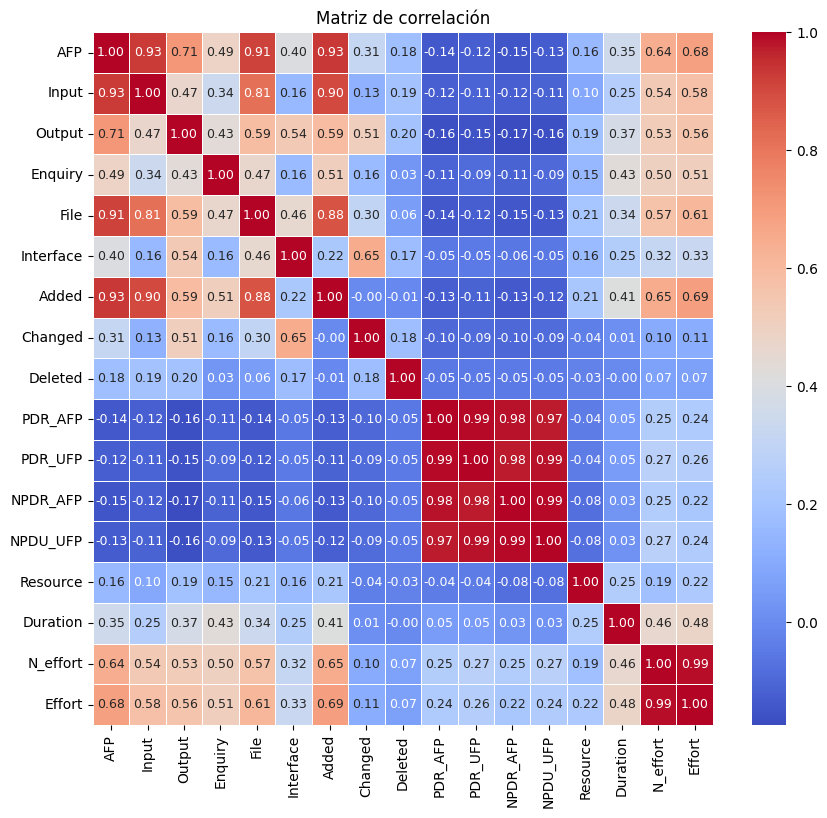

In [ ]:
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 9}, linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Pares de atributos con correlación superior a 0.95
high_correlation_pairs = []
atributos = []

# Recorre la matriz de correlación y verifica los valores
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            attribute_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(attribute_pair)

# Imprime los pares de atributos con correlación superior a 0.8 y crear una lista de atributos sin repetir
for pair in high_correlation_pairs:
    print("Correlación alta entre: ", pair[0], "y", pair[1])
    atributos.extend(pair)

# Eliminar duplicados y mantener el orden
atributos = list(dict.fromkeys(atributos))
atributos.remove('Effort') # eliminamos la variable de salida

# Imprimir la lista de atributos
print("Lista de atributos con correlación alta: ", atributos)

Correlación alta entre:  AFP y Input
Correlación alta entre:  AFP y File
Correlación alta entre:  AFP y Added
Correlación alta entre:  Input y File
Correlación alta entre:  Input y Added
Correlación alta entre:  File y Added
Correlación alta entre:  PDR_AFP y PDR_UFP
Correlación alta entre:  PDR_AFP y NPDR_AFP
Correlación alta entre:  PDR_AFP y NPDU_UFP
Correlación alta entre:  PDR_UFP y NPDR_AFP
Correlación alta entre:  PDR_UFP y NPDU_UFP
Correlación alta entre:  NPDR_AFP y NPDU_UFP
Correlación alta entre:  N_effort y Effort
Lista de atributos con correlación alta:  ['AFP', 'Input', 'File', 'Added', 'PDR_AFP', 'PDR_UFP', 'NPDR_AFP', 'NPDU_UFP', 'N_effort']


**VALIDACIÓN CRUZADA PARA COMPROBAR EL EFECTO DE LOS PARÁMETROS:**

In [ ]:
# Defino los algoritmos base para evaluar
reg_svr=svm.SVR()
rfr=RandomForestRegressor()
knnr=KNeighborsRegressor()
reg_gbr=GradientBoostingRegressor()
votr=VotingRegressor([('svr',reg_svr),('rf',rfr),('gbr',reg_gbr),('knn',knnr)])
modelos=[reg_svr, rfr, reg_gbr, knnr, votr]

In [ ]:
for i in atributos:
  print("\n##########################################################################################################")
  print("\nPARA EL ATRIBUTO: ", i)
  # Preparando los datos
  x=df[feature_names].values
  y=df['Effort'].values

  alg_escalado = StandardScaler(with_mean=True, with_std=True)
  x_escalado = alg_escalado.fit_transform(x)
  y=y.reshape(-1,1)
  y_escalado = alg_escalado.fit_transform(y)

  df_x_transf = pd.DataFrame(x_escalado, columns=feature_names)
  df_y_transf = pd.DataFrame(y_escalado, columns=['Effort'])
  df_data_transf = pd.concat([df_x_transf, df_y_transf], axis=1)

  X=df_data_transf[feature_names]
  Y=df_data_transf['Effort']

  x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)
  x_train_sin=x_train.drop(i, axis=1)

  for j in modelos:
    # Realizar validación cruzada con y sin el atributo con alta correlación:
    # Con el atributo
    cv_scores_con = cross_val_score(j, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Sin el atributo
    cv_scores_sin = cross_val_score(j, x_train_sin, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calcular el estadístico t y el p-valor
    t_statistic, p_value = ttest_rel(cv_scores_con, cv_scores_sin)

    # Mostrar los resultados
    print("-------------------------------------------------------------------------------------------------------------")
    print("El modelo: ", j)
    print("MSE de validación cruzada (con atributo):", cv_scores_con)
    print("MSE de validación cruzada (sin atributo):", cv_scores_sin)
    print("El MSE medio con atributo es: ", np.mean(cv_scores_con), "\nEl MSE medio sin atributo es: ", np.mean(cv_scores_sin))
    if np.mean(cv_scores_con) > np.mean(cv_scores_sin):
      print("El atributo mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))
    else:
      print("El atributo no mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))

    print("Estadístico t:", t_statistic)
    print("p-valor:", p_value)


##########################################################################################################

PARA EL ATRIBUTO:  PDR_AFP
-------------------------------------------------------------------------------------------------------------
El modelo:  SVR()
MSE de validación cruzada (con atributo): [-0.27689425 -0.37420489 -0.01319748 -0.05294927 -0.0122186 ]
MSE de validación cruzada (sin atributo): [-0.28090148 -0.37823611 -0.0127384  -0.05573054 -0.01134484]
El MSE medio con atributo es:  -0.14589289861186677 
El MSE medio sin atributo es:  -0.14779027274909876
El atributo mejora el desempeño del modelo, con una diferencia de:  0.001897374137231983
Estadístico t: 1.7686130382682892
p-valor: 0.15168476966588632
-------------------------------------------------------------------------------------------------------------
El modelo:  RandomForestRegressor()
MSE de validación cruzada (con atributo): [-0.04532694 -0.05990966 -0.00440529 -0.01786971 -0.002155  ]
MSE de validación cru

In [ ]:
#estos atributos tienen alta correlación, por lo tanto los elimino
feature_names.remove('PDR_AFP')
feature_names.remove('NPDR_AFP')
feature_names.remove('NPDU_UFP')
feature_names.remove('N_effort')
print(feature_names)

['AFP', 'Input', 'Output', 'Enquiry', 'File', 'Interface', 'Added', 'Changed', 'Deleted', 'PDR_UFP', 'Resource', 'Duration']


In [ ]:
df_final=df
df_final=df_final.drop('PDR_AFP', axis=1)
df_final=df_final.drop('NPDR_AFP', axis=1)
df_final=df_final.drop('NPDU_UFP', axis=1)
df_final=df_final.drop('N_effort', axis=1)
df_final.describe()

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_UFP,Resource,Duration,Effort
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000
mean,486.857715,167.098196,113.601202,61.601202,91.234469,24.234469,360.354709,85.062124,12.352705,12.07976,1.458918,8.719238,3921.048096
std,1059.171436,486.338575,221.274374,105.422840,210.270984,85.040996,829.842333,290.857039,124.224130,12.81871,0.823729,7.347058,6480.855600
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.30000,1.000000,1.000000,26.000000
25%,100.500000,27.000000,13.000000,6.000000,14.000000,0.000000,38.000000,0.000000,0.000000,4.20000,1.000000,4.000000,703.500000
50%,215.000000,63.000000,42.000000,24.000000,36.000000,0.000000,135.000000,4.000000,0.000000,8.00000,1.000000,7.000000,1829.000000
75%,437.500000,152.500000,112.000000,68.500000,84.000000,20.000000,325.500000,87.000000,0.000000,15.75000,2.000000,11.000000,3826.500000
max,17518.000000,9404.000000,2455.000000,952.000000,2955.000000,1572.000000,13580.000000,5193.000000,2657.000000,96.60000,4.000000,84.000000,54620.000000


In [ ]:
# Tomar los valores de la variable dependiente (y) y las independientes (x)
x=df[feature_names].values
y=df['Effort'].values

#se realiza una normalización con el objetivo de obtener una distribución de media cero y varianza uno
alg_escalado = StandardScaler(with_mean=True, with_std=True)
x_escalado = alg_escalado.fit_transform(x)
y=y.reshape(-1,1) #es necesario que sea un array 1d
y_escalado = alg_escalado.fit_transform(y)
y_escalado=y_escalado.ravel() #para aplanar y_escalado

df_x_transf = pd.DataFrame(x_escalado, columns=feature_names)
df_y_transf = pd.DataFrame(y_escalado, columns=['Effort'])
df_data_transf = pd.concat([df_x_transf, df_y_transf], axis=1)

X=df_data_transf[feature_names]
Y=df_data_transf['Effort']

In [ ]:
#dividir en conjunto de entrenamiento y test 70%-30%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

# **Algoritmos:**

## **SVR:**

**GRIDSEARCHCV:**

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=svm.SVR()
params={'kernel':['linear','poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4],'gamma':['auto','scale', 0.1],'C':list(np.arange(0.5,21.5,1))}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 672 candidates, totalling 10080 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=SVR(),
             param_grid={'C': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5,
                               10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5,
                               18.5, 19.5, 20.5],
                         'degree': [1, 2, 3, 4], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 7.5, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVR(C=7.5, degree=1)
0.7519579978363251


In [ ]:
#definir algoritmo SVR con los mejores parámetros
svr = svm.SVR(kernel='rbf',gamma='scale', degree=1, C=7.5)

In [ ]:
#entrenamiento
modelo_svr=svr.fit(x_train,y_train)

In [ ]:
#predicciones
y_pred = modelo_svr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
460 -0.559291  -0.607421
73  -0.558518  -0.551977
231 -0.575045  -0.557631
175  0.037525   0.105436
237  1.422373   1.892751
..        ...        ...
193 -0.487623  -0.472810
5   -0.399738  -0.396825
116 -0.544617  -0.520134
45   0.218084   1.684043
16  -0.220106  -0.206493

[150 rows x 2 columns]
Desviación Estándar Predicciones: 0.77
Media Predicciones: -0.04


In [ ]:
#calcular residuos
residuos = y_test - y_pred
print(residuos)

460    0.048130
73    -0.006542
231   -0.017414
175   -0.067911
237   -0.470378
         ...   
193   -0.014813
5     -0.002913
116   -0.024483
45    -1.465960
16    -0.013614
Name: Effort, Length: 150, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: -0.0568
Median Bias Error: -0.0139
Maximum Absolute Error: 4.0861
Interquartile Range of Error: 0.0930
Standard Deviation of Error: 0.4911
Variance of Error: 0.2412
---------------------------------------------------
Mean absolute error: 0.17
Median absolute error: 0.04
Mean absolute percentage error: 76.87 %
Mean squared error: 0.24
Root mean squared error: 0.49
Root mean squared percentage error: 36.26 %
Coefficient of determination: 0.67
---------------------------------------------------
Mean Magnitude of Error: 0.0210
Median Magnitude of Error: -0.0620
Percentage of Relative Error within 25%: 90.67 %


In [ ]:
modelo_svr.score(x_test, y_test)

0.6746980771069782

In [ ]:
modelo_svr.score(x_train, y_train)

0.9963550544927409

**VALIDACIÓN CRUZADA**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_svr=svm.SVR(kernel='rbf',gamma='scale', degree=1, C=7.5)
    cv_svr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_svr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.17
CV Mean squared error: 0.30
CV Root mean squared error: 0.53
CV Coefficient of determination: 0.70
CV Mean Magnitude of Error: 0.4573
CV Percentage of Relative Error within 25%: 86.38 %


In [ ]:
cv_results = cross_validate(svr, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.1555839  -0.12924809 -0.18625722 -0.17675239 -0.21619837]  // Con una media de:  -0.17280799248552012
Error Cuadrático Medio:  [-0.20946184 -0.13995826 -0.46290195 -0.17446165 -0.50187393]  // Con una media de:  -0.29773152533777264
Raiz Error Cuadrático Medio:  [-0.45767001 -0.37410996 -0.68036898 -0.41768607 -0.70843061]  // Con una media de:  -0.5276531247206281
Coeficiente de Determinación:  [0.58349252 0.82256004 0.63713911 0.85160034 0.58612731]  // Con una media de:  0.6961838626718138


In [ ]:
score_result={"Modelo":["SVR"],"MAE":[mean_mae], "MSE":[mean_mse], "RMSE":[mean_rmse], "R2":[mean_r2], "MMRE":[abs(mean_mmre)], "PRED(0.25)":[mean_pred_25/100]}
score_result=pd.DataFrame(score_result)

In [ ]:
score_result

,Modelo,MAE,MSE,RMSE,R2,MMRE,PRED(0.25)
0,SVR,0.172808,0.297732,0.527653,0.696184,0.457349,0.863758


## **RandomForest:**

In [ ]:
modelo=RandomForestRegressor(random_state=42)
params={'n_estimators':[50,100,200,400],'criterion':["squared_error", "absolute_error"],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,5],'bootstrap':[True,False],'max_depth':[1,3,5,10]}
score={'mae':'neg_mean_absolute_error','rmse':'neg_root_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 1280 candidates, totalling 19200 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      n_estimators=400, random_state=42)
0.7830345831146192


In [ ]:
rf = RandomForestRegressor(criterion='absolute_error', max_depth=10, n_estimators=400, random_state=42)

In [ ]:
modelo_rf=rf.fit(x_train,y_train)

In [ ]:
y_pred = modelo_rf.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
460 -0.559291  -0.530677
73  -0.558518  -0.539637
231 -0.575045  -0.562786
175  0.037525   0.090258
237  1.422373   1.792021
..        ...        ...
193 -0.487623  -0.474878
5   -0.399738  -0.345577
116 -0.544617  -0.540378
45   0.218084   1.620234
16  -0.220106  -0.212017

[150 rows x 2 columns]
Desviación Estándar Predicciones: 0.75
Media Predicciones: -0.06


In [ ]:
residuos = y_test - y_pred
print(residuos)

460   -0.028614
73    -0.018881
231   -0.012259
175   -0.052733
237   -0.369648
         ...   
193   -0.012745
5     -0.054161
116   -0.004239
45    -1.402150
16    -0.008089
Name: Effort, Length: 150, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: -0.0324
Median Bias Error: -0.0143
Maximum Absolute Error: 2.8879
Interquartile Range of Error: 0.0480
Standard Deviation of Error: 0.3353
Variance of Error: 0.1124
---------------------------------------------------
Mean absolute error: 0.11
Median absolute error: 0.02
Mean absolute percentage error: 39.59 %
Mean squared error: 0.11
Root mean squared error: 0.34
Root mean squared percentage error: 14.27 %
Coefficient of determination: 0.85
---------------------------------------------------
Mean Magnitude of Error: 0.0115
Median Magnitude of Error: -0.0318
Percentage of Relative Error within 25%: 88.67 %


In [ ]:
modelo_rf.score(x_test, y_test)

0.8489610333975022

In [ ]:
modelo_rf.score(x_train, y_train)

0.9710786300264823

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_rf=RandomForestRegressor(criterion='absolute_error', max_depth=10, n_estimators=400, random_state=42)
    cv_rf.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_rf.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.13
CV Mean squared error: 0.18
CV Root mean squared error: 0.39
CV Coefficient of determination: 0.84
CV Mean Magnitude of Error: 0.0584
CV Percentage of Relative Error within 25%: 85.38 %


In [ ]:
cv_results = cross_validate(rf, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.09712269 -0.07907976 -0.15944121 -0.15501217 -0.14026277]  // Con una media de:  -0.1261837184891618
Error Cuadrático Medio:  [-0.07135447 -0.03202657 -0.290892   -0.15009506 -0.34283993]  // Con una media de:  -0.17744160505921877
Raiz Error Cuadrático Medio:  [-0.26712257 -0.17895968 -0.53934405 -0.38742104 -0.58552535]  // Con una media de:  -0.3916745359750468
Coeficiente de Determinación:  [0.85811416 0.95939652 0.77197476 0.87232692 0.71727544]  // Con una media de:  0.83581755853875


In [ ]:
score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-41-06667e9c6bdf>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


## **GradientBoostingRegresor:**

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=GradientBoostingRegressor(random_state=42)
params={'loss':['squared_error', 'absolute_error'],'learning_rate':[0.1,0.3,0.5,1.0],'n_estimators':[50,100,200,400],'criterion':['friedman_mse','squared_error'],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,5],'max_depth':[1,3,5,10]}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
GradientBoostingRegressor(loss='huber', max_depth=None, min_samples_leaf=5,
                          random_state=42)
-0.04380156884445896


In [ ]:
gbr=GradientBoostingRegressor(max_depth=None,loss='absolute_error',random_state=42,min_samples_split=4,n_estimators=100)

In [ ]:
modelo_gbr=gbr.fit(x_train,y_train)

In [ ]:
y_pred = modelo_gbr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
460 -0.559291  -0.531275
73  -0.558518  -0.544060
231 -0.575045  -0.557092
175  0.037525   0.166943
237  1.422373   2.105409
..        ...        ...
193 -0.487623  -0.482564
5   -0.399738  -0.359705
116 -0.544617  -0.541845
45   0.218084   0.757018
16  -0.220106  -0.131226

[150 rows x 2 columns]
Desviación Estándar Predicciones: 0.75
Media Predicciones: -0.08


In [ ]:
residuos = y_test - y_pred
print(residuos)

460   -0.028016
73    -0.014459
231   -0.017953
175   -0.129418
237   -0.683036
         ...   
193   -0.005059
5     -0.040033
116   -0.002772
45    -0.538935
16    -0.088881
Name: Effort, Length: 150, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: -0.0101
Median Bias Error: -0.0045
Maximum Absolute Error: 3.3338
Interquartile Range of Error: 0.0589
Standard Deviation of Error: 0.3366
Variance of Error: 0.1133
---------------------------------------------------
Mean absolute error: 0.10
Median absolute error: 0.03
Mean absolute percentage error: 31.46 %
Mean squared error: 0.11
Root mean squared error: 0.34
Root mean squared percentage error: 7.60 %
Coefficient of determination: 0.85
---------------------------------------------------
Mean Magnitude of Error: 0.0238
Median Magnitude of Error: -0.0256
Percentage of Relative Error within 25%: 87.33 %


In [ ]:
modelo_gbr.score(x_test, y_test)

0.8490882910590013

In [ ]:
modelo_gbr.score(x_train, y_train)

0.9839335977765906

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_gbr=GradientBoostingRegressor(max_depth=None,loss='absolute_error',random_state=42,min_samples_split=4,n_estimators=100)
    cv_gbr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_gbr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.12
CV Mean squared error: 0.18
CV Root mean squared error: 0.39
CV Coefficient of determination: 0.84
CV Mean Magnitude of Error: 0.0233
CV Percentage of Relative Error within 25%: 86.17 %


In [ ]:
cv_results = cross_validate(gbr, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.08557864 -0.09511131 -0.17077694 -0.12640527 -0.14338613]  // Con una media de:  -0.12425165619593401
Error Cuadrático Medio:  [-0.04334675 -0.04334362 -0.36626073 -0.10795563 -0.36289502]  // Con una media de:  -0.18476034854923618
Raiz Error Cuadrático Medio:  [-0.20819882 -0.2081913  -0.60519479 -0.32856602 -0.60240769]  // Con una media de:  -0.39051172169074444
Coeficiente de Determinación:  [0.91380652 0.94504869 0.7128945  0.90817134 0.70073692]  // Con una media de:  0.8361315954468374


In [ ]:
score_result=score_result.append({"Modelo":"GradienBoosting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-51-e4bd913ac2fd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"GradienBoosting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


## **Voting:**

In [ ]:
reg_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])

In [ ]:
modelo_voting=reg_vot.fit(x_train,y_train)

In [ ]:
y_pred = modelo_voting.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
460 -0.559291  -0.556457
73  -0.558518  -0.545224
231 -0.575045  -0.559170
175  0.037525   0.120879
237  1.422373   1.930060
..        ...        ...
193 -0.487623  -0.476751
5   -0.399738  -0.367369
116 -0.544617  -0.534119
45   0.218084   1.353765
16  -0.220106  -0.183245

[150 rows x 2 columns]
Desviación Estándar Predicciones: 0.74
Media Predicciones: -0.06


In [ ]:
residuos = y_test - y_pred
print(residuos)

460   -0.002833
73    -0.013294
231   -0.015876
175   -0.083354
237   -0.507687
         ...   
193   -0.010872
5     -0.032369
116   -0.010498
45    -1.135682
16    -0.036861
Name: Effort, Length: 150, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: -0.0331
Median Bias Error: -0.0122
Maximum Absolute Error: 3.4360
Interquartile Range of Error: 0.0509
Standard Deviation of Error: 0.3557
Variance of Error: 0.1265
---------------------------------------------------
Mean absolute error: 0.11
Median absolute error: 0.03
Mean absolute percentage error: 43.35 %
Mean squared error: 0.13
Root mean squared error: 0.36
Root mean squared percentage error: 18.07 %
Coefficient of determination: 0.83
---------------------------------------------------
Mean Magnitude of Error: 0.0479
Median Magnitude of Error: -0.0343
Percentage of Relative Error within 25%: 91.33 %


In [ ]:
modelo_voting.score(x_test, y_test)

0.8301367911260392

In [ ]:
modelo_voting.score(x_train, y_train)

0.9896821787747254

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])
    cv_vot.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_vot.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = np.sum(mre <= 0.25)
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.12
CV Mean squared error: 0.19
CV Root mean squared error: 0.41
CV Coefficient of determination: 0.82
CV Mean Magnitude of Error: 0.1695
CV Percentage of Relative Error within 25%: 88.78 %


In [ ]:
cv_results = cross_validate(reg_vot, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.10160209 -0.0859141  -0.14533413 -0.14089694 -0.14646336]  // Con una media de:  -0.12404212414282059
Error Cuadrático Medio:  [-0.07234219 -0.0507024  -0.34285551 -0.12467708 -0.377019  ]  // Con una media de:  -0.19351923584360908
Raiz Error Cuadrático Medio:  [-0.26896503 -0.22517193 -0.58553865 -0.35309642 -0.61401873]  // Con una media de:  -0.40935815241551293
Coeficiente de Determinación:  [0.85615011 0.93571918 0.73124146 0.89394783 0.68908951]  // Con una media de:  0.8212296163165576


In [ ]:
score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-61-c16958f5272a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


# **Explicabilidad:**

In [ ]:
# Crear las columnas del MultiIndex
columns_multi = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

## **SVR:**

**FEATURE IMPORTANCE:**

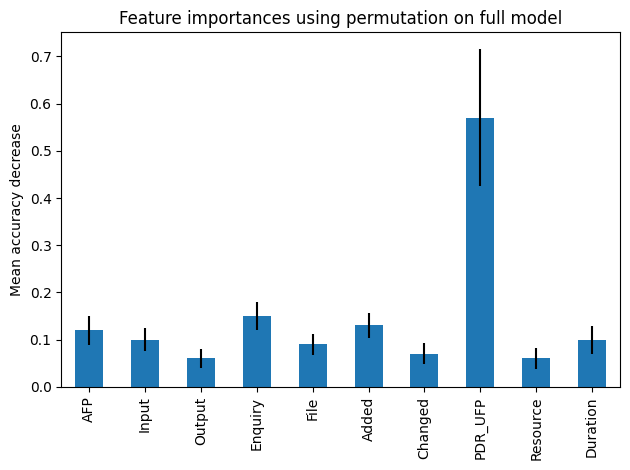

In [ ]:
#uso de permutation importance
permu = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(2), index=feature_names)[permu.importances_mean.round(2) > 0.01]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(2) > 0.01], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

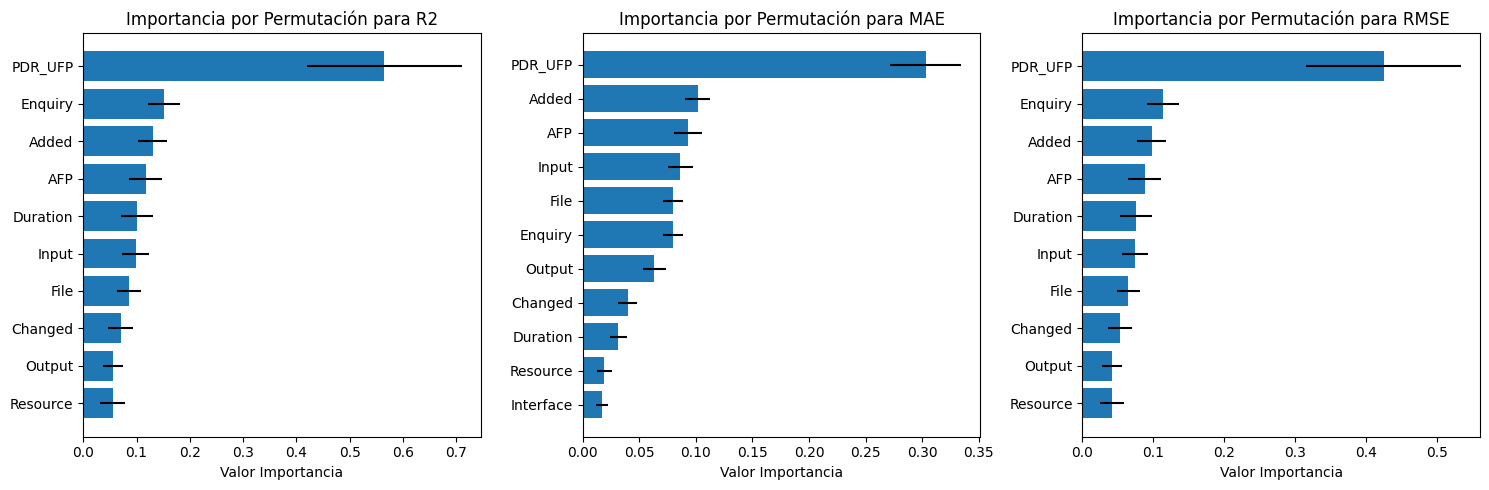

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(2) > 0.01]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_svr = {}

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(2) > 0.01]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_svr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_svr['df_global_R2']

,Feature,Importance_Mean,Importance_Std
7,PDR_UFP,0.565161,0.145388
3,Enquiry,0.151776,0.030208
5,Added,0.130243,0.027164
0,AFP,0.117169,0.030768
9,Duration,0.100701,0.029640
1,Input,0.098291,0.024823
4,File,0.085900,0.021747
6,Changed,0.070056,0.022744
2,Output,0.055697,0.019317
8,Resource,0.055092,0.022862


In [ ]:
results_global_svr['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
8,PDR_UFP,0.303427,0.031384
6,Added,0.101533,0.010909
0,AFP,0.092947,0.012515
1,Input,0.086360,0.011038
4,File,0.079882,0.009051
3,Enquiry,0.079839,0.008997
2,Output,0.063221,0.010427
7,Changed,0.039808,0.008430
10,Duration,0.031421,0.007639
9,Resource,0.019032,0.006878


In [ ]:
results_global_svr['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
7,PDR_UFP,0.424608,0.109231
3,Enquiry,0.114030,0.022695
5,Added,0.097852,0.020408
0,AFP,0.088029,0.023116
9,Duration,0.075657,0.022269
1,Input,0.073846,0.018650
4,File,0.064537,0.016339
6,Changed,0.052633,0.017087
2,Output,0.041845,0.014513
8,Resource,0.041391,0.017176


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_svr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 349 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 349 values
  -> model_class       : sklearn.svm._classes.SVR (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7b4830fd6dd0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.644, mean = 0.0416, max = 7.73
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.117, mean = -0.002, max = 0.184
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  124
El valor máximo obtenido es:  4.433090956462884
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  60
El valor mínimo obtenido es:  -0.6416746483764775
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  76
El valor de la mediana es:  -0.3303483784900547


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

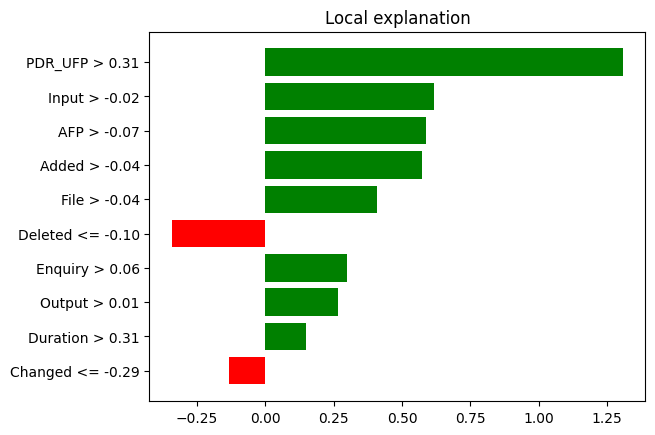

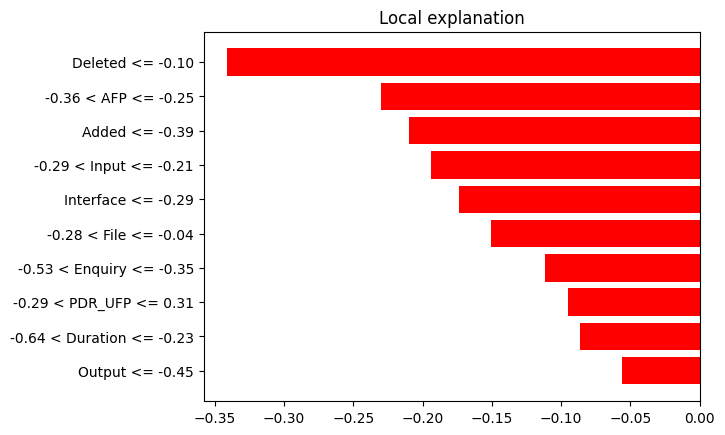

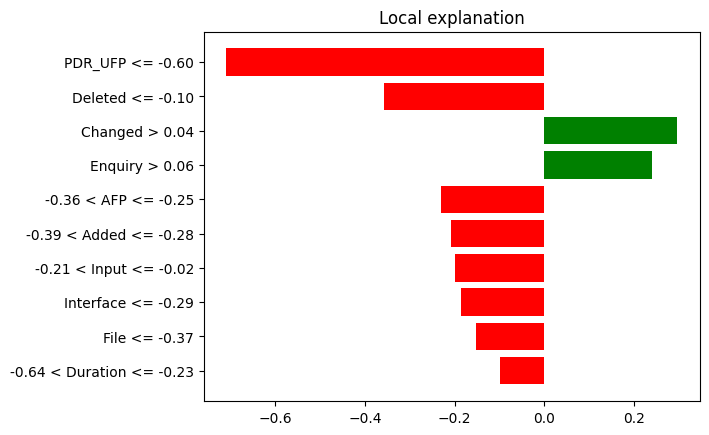

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 13])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(12)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

   Variable  Ranking     Signo
0  Resource        1  Positivo
1   Enquiry        2  Positivo
2  Duration        3  Positivo
3     Added        4  Positivo
4   PDR_UFP        5  Positivo
   Variable  Ranking     Signo
0   Enquiry        1  Positivo
1  Duration        2  Positivo
2     Added        3  Positivo
3   PDR_UFP        4  Positivo
4      File        5  Positivo
  Variable  Ranking     Signo
0  PDR_UFP        1  Positivo
1    Input        2  Positivo
2      AFP        3  Positivo
3    Added        4  Positivo
4     File        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Resource', 'Enquiry', 'Duration', 'Added', 'PDR_UFP']
['Enquiry', 'Duration', 'Added', 'PDR_UFP', 'File']
['PDR_UFP', 'Input', 'AFP', 'Added', 'File']
['AFP', 'Duration', 'Enquiry', 'Input', 'File', 'Resource', 'PDR_UFP', 'Added']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       AFP         -         -       -         -       3  Positivo
1  Duration         3  Positivo       2  Positivo       -         -
2   Enquiry         2  Positivo       1  Positivo       -         -
3     Input         -         -       -         -       2  Positivo
4      File         -         -       5  Positivo       5  Positivo
5  Resource         1  Positivo       -         -       -         -
6   PDR_UFP         5  Positivo       4  Positivo       1  Positivo
7     Added         4  Positivo       3  Positivo       4  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Resource", "Enquiry", "Duration", "Added", "PDR_UFP", "File", "Input", "AFP"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Resource         1  Positivo       -         -       -         -
Enquiry          2  Positivo       1  Positivo       -         -
Duration         3  Positivo       2  Positivo       -         -
Added            4  Positivo       3  Positivo       4  Positivo
PDR_UFP          5  Positivo       4  Positivo       1  Positivo
File             -         -       5  Positivo       5  Positivo
Input            -         -       -         -       2  Positivo
AFP              -         -       -         -       3  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 13])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(12)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[1, "Variable"]="AFP"
lime_df_median.at[3, "Variable"]="Input"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

  Variable  Ranking     Signo
0    Added        1  Negativo
1  PDR_UFP        2  Positivo
2   Output        3  Negativo
3      AFP        4  Negativo
4    Input        5  Negativo
  Variable  Ranking     Signo
0    Added        1  Negativo
1  PDR_UFP        2  Positivo
2   Output        3  Negativo
3      AFP        4  Negativo
4    Input        5  Negativo
    Variable  Ranking     Signo
0    Deleted        1  Negativo
1        AFP        2  Negativo
2      Added        3  Negativo
3      Input        4  Negativo
4  Interface        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Added', 'PDR_UFP', 'Output', 'AFP', 'Input']
['Added', 'PDR_UFP', 'Output', 'AFP', 'Input']
['Deleted', 'AFP', 'Added', 'Input', 'Interface']
['AFP', 'Interface', 'Input', 'PDR_UFP', 'Added', 'Output', 'Deleted']


Variable Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
0        AFP         4  Negativo       4  Negativo       2  Negativo
1  Interface         -         -       -         -       5  Negativo
2      Input         5  Negativo       5  Negativo       4  Negativo
3    PDR_UFP         2  Positivo       2  Positivo       -         -
4      Added         1  Negativo       1  Negativo       3  Negativo
5     Output         3  Negativo       3  Negativo       -         -
6    Deleted         -         -       -         -       1  Negativo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Added", "PDR_UFP", "Output", "AFP", "Input", "Deleted", "Interface"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
            Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                         
Added             1  Negativo       1  Negativo       3  Negativo
PDR_UFP           2  Positivo       2  Positivo       -         -
Output            3  Negativo       3  Negativo       -         -
AFP               4  Negativo       4  Negativo       2  Negativo
Input             5  Negativo       5  Negativo       4  Negativo
Deleted           -         -       -         -       1  Negativo
Interface         -         -       -         -       5  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 13])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(12)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[4, "Variable"] = "AFP"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

    Variable  Ranking     Signo
0    PDR_UFP        1  Negativo
1     Output        2  Negativo
2      Added        3  Negativo
3  Interface        4  Negativo
4       File        5  Negativo
  Variable  Ranking     Signo
0  PDR_UFP        1  Negativo
1    Added        2  Negativo
2   Output        3  Negativo
3  Enquiry        4  Negativo
4     File        5  Negativo
  Variable  Ranking     Signo
0  PDR_UFP        1  Negativo
1  Deleted        2  Negativo
2  Changed        3  Positivo
3  Enquiry        4  Positivo
4      AFP        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['PDR_UFP', 'Output', 'Added', 'Interface', 'File']
['PDR_UFP', 'Added', 'Output', 'Enquiry', 'File']
['PDR_UFP', 'Deleted', 'Changed', 'Enquiry', 'AFP']
['AFP', 'Interface', 'Enquiry', 'File', 'PDR_UFP', 'Added', 'Output', 'Deleted', 'Changed']


Variable Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
0        AFP         -         -       -         -       5  Negativo
1  Interface         4  Negativo       -         -       -         -
2    Enquiry         -         -       4  Negativo       4  Positivo
3       File         5  Negativo       5  Negativo       -         -
4    PDR_UFP         1  Negativo       1  Negativo       1  Negativo
5      Added         3  Negativo       2  Negativo       -         -
6     Output         2  Negativo       3  Negativo       -         -
7    Deleted         -         -       -         -       2  Negativo
8    Changed         -         -       -         -       3  Positivo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["PDR_UFP", "Output", "Added", "Interface", "File", "Enquiry", "Deleted", "Changed"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
            Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                         
PDR_UFP           1  Negativo       1  Negativo       1  Negativo
Output            2  Negativo       3  Negativo       -         -
Added             3  Negativo       2  Negativo       -         -
Interface         4  Negativo       -         -       -         -
File              5  Negativo       5  Negativo       -         -
Enquiry           -         -       4  Negativo       4  Positivo
Deleted           -         -       -         -       2  Negativo
Changed           -         -       -         -       3  Positivo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Resource', 1), ('Enquiry', 2), ('Duration', 3), ('Added', 4), ('PDR_UFP', 5), ('Added', 1), ('PDR_UFP', 2), ('Output', 3), ('AFP', 4), ('Input', 5), ('PDR_UFP', 1), ('Output', 2), ('Added', 3), ('Interface', 4), ('File', 5)], 'Shapley': [('Enquiry', 1), ('Duration', 2), ('Added', 3), ('PDR_UFP', 4), ('File', 5), ('Added', 1), ('PDR_UFP', 2), ('Output', 3), ('AFP', 4), ('Input', 5), ('PDR_UFP', 1), ('Output', 3), ('Added', 2), ('File', 5), ('Enquiry', 4)], 'Lime': [('Added', 4), ('PDR_UFP', 1), ('File', 5), ('Input', 2), ('AFP', 3), ('Added', 3), ('AFP', 2), ('Input', 4), ('Deleted', 1), ('Interface', 5), ('PDR_UFP', 1), ('Enquiry', 4), ('Deleted', 2), ('Changed', 3)]}
{'Breakdown': {'Resource': 1, 'Enquiry': 1, 'Duration': 1, 'Added': 3, 'PDR_UFP': 3, 'Output': 2, 'AFP': 1, 'Input': 1, 'Interface': 1, 'File': 1}, 'Shapley': {'Enquiry': 2, 'Duration': 1, 'Added': 3, 'PDR_UFP': 3, 'File': 2, 'Output': 2, 'AFP': 1, 'Input': 1}, 'Lime': {'Added': 2, 'PDR_UFP': 2, 'File': 1

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_svr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_svr

Breakdown              Shapley                 Lime       
          Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
Changed               -      -             -      -           3.0      1
Deleted               -      -             -      -           1.5      2
PDR_UFP        2.666667      3      2.333333      3           1.0      2
Resource            1.0      1             -      -             -      -
Interface           4.0      1             -      -           5.0      1
Duration            3.0      1           2.0      1             -      -
AFP                 4.0      1           4.0      1           2.5      2
Output              2.5      2           3.0      2             -      -
Added          2.666667      3           2.0      3           3.5      2
File                5.0      1           5.0      2           5.0      1
Input               5.0      1           5.0      1           3.0      2
Enquiry             2.0      1           2.5      2           4.0      1

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_svr[("General", "Conteo Total")] = df_resumen_svr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_svr

Breakdown              Shapley                 Lime         \
          Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Changed               -      -             -      -           3.0      1   
Deleted               -      -             -      -           1.5      2   
PDR_UFP        2.666667      3      2.333333      3           1.0      2   
Resource            1.0      1             -      -             -      -   
Interface           4.0      1             -      -           5.0      1   
Duration            3.0      1           2.0      1             -      -   
AFP                 4.0      1           4.0      1           2.5      2   
Output              2.5      2           3.0      2             -      -   
Added          2.666667      3           2.0      3           3.5      2   
File                5.0      1           5.0      2           5.0      1   
Input               5.0      1           5.0      1           3.0      2   
Enquiry             2.0      1           2.5      2           4.0      1   

            General               
            Ranking Conteo Total  
Changed    3.000000            1  
Deleted    1.500000            2  
PDR_UFP    2.000000            8  
Resource   1.000000            1  
Interface  4.500000            2  
Duration   2.500000            2  
AFP        3.500000            4  
Output     2.750000            4  
Added      2.722222            8  
File       5.000000            4  
Input      4.333333            4  
Enquiry    2.833333            4

In [ ]:
# Obtener el número de características
num_caract = df_resumen_svr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_svr[("General", "Peso Rango")] = 1 - ((df_resumen_svr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_svr[("General", "Peso Conteo")] = df_resumen_svr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_svr[("General", "Puntaje")] = df_resumen_svr[("General", "Peso Rango")] + df_resumen_svr[("General", "Peso Conteo")]
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_svr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_svr

Breakdown              Shapley                 Lime         \
          Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Changed               -      -             -      -           3.0      1   
Deleted               -      -             -      -           1.5      2   
PDR_UFP        2.666667      3      2.333333      3           1.0      2   
Resource            1.0      1             -      -             -      -   
Interface           4.0      1             -      -           5.0      1   
Duration            3.0      1           2.0      1             -      -   
AFP                 4.0      1           4.0      1           2.5      2   
Output              2.5      2           3.0      2             -      -   
Added          2.666667      3           2.0      3           3.5      2   
File                5.0      1           5.0      2           5.0      1   
Input               5.0      1           5.0      1           3.0      2   
Enquiry             2.0      1           2.5      2           4.0      1   

          General               
          Ranking Conteo Total  
Changed      11.0            1  
Deleted       3.0            2  
PDR_UFP       1.0            8  
Resource      6.0            1  
Interface    12.0            2  
Duration      7.0            2  
AFP           8.0            4  
Output        3.0            4  
Added         2.0            8  
File         10.0            4  
Input         9.0            4  
Enquiry       5.0            4

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_svr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_svr = df_resumen_svr[new_columns]

In [ ]:
df_resumen_svr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_svr[(tech, "Ranking Medio")] = df_resumen_svr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_svr

General                  Breakdown              Shapley         \
          Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
PDR_UFP       1.0            8          2.67      3          2.33      3   
Added         2.0            8          2.67      3          2.00      3   
Deleted       3.0            2             -      -             -      -   
Output        3.0            4          2.50      2          3.00      2   
Enquiry       5.0            4          2.00      1          2.50      2   
Resource      6.0            1          1.00      1             -      -   
Duration      7.0            2          3.00      1          2.00      1   
AFP           8.0            4          4.00      1          4.00      1   
Input         9.0            4          5.00      1          5.00      1   
File         10.0            4          5.00      1          5.00      2   
Changed      11.0            1             -      -             -      -   
Interface    12.0            2          4.00      1             -      -   

                   Lime         
          Ranking Medio Conteo  
PDR_UFP            1.00      2  
Added              3.50      2  
Deleted            1.50      2  
Output                -      -  
Enquiry            4.00      1  
Resource              -      -  
Duration              -      -  
AFP                2.50      2  
Input              3.00      2  
File               5.00      1  
Changed            3.00      1  
Interface          5.00      1

## **RandomForest:**

**FEATURE IMPORTANCE:**

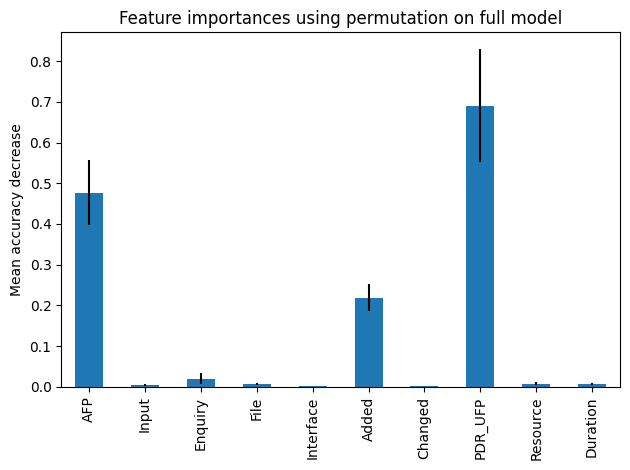

In [ ]:
#uso de permutation importance
permu = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

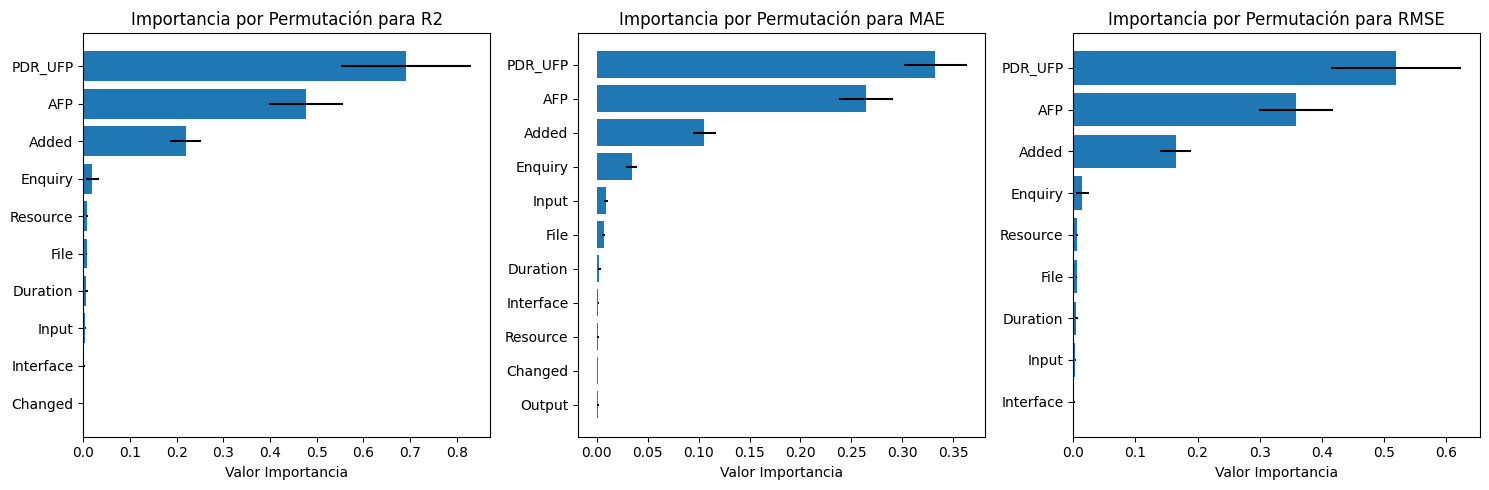

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_rf = {}

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_rf[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_rf['df_global_R2']

,Feature,Importance_Mean,Importance_Std
7,PDR_UFP,0.691423,0.138348
0,AFP,0.476573,0.079516
5,Added,0.219114,0.033664
2,Enquiry,0.019859,0.013204
8,Resource,0.008305,0.002650
3,File,0.007043,0.001827
9,Duration,0.006947,0.003279
1,Input,0.004679,0.001883
4,Interface,0.001720,0.001104
6,Changed,0.000645,0.000201


In [ ]:
results_global_rf['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
8,PDR_UFP,0.332478,0.030807
0,AFP,0.264766,0.026681
6,Added,0.105623,0.011321
3,Enquiry,0.034430,0.005423
1,Input,0.008808,0.002150
4,File,0.006640,0.001230
10,Duration,0.002370,0.001411
5,Interface,0.001447,0.000642
9,Resource,0.001279,0.000969
7,Changed,0.001039,0.000385


In [ ]:
results_global_rf['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
6,PDR_UFP,0.519469,0.103941
0,AFP,0.358052,0.059741
5,Added,0.164622,0.025292
2,Enquiry,0.014920,0.009920
7,Resource,0.006240,0.001991
3,File,0.005291,0.001373
8,Duration,0.005219,0.002463
1,Input,0.003515,0.001415
4,Interface,0.001292,0.000829


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_rf, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 349 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 349 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7b4830fd6dd0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.594, mean = 0.0273, max = 5.89
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.677, mean = 0.0123, max = 1.94
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  89
El valor máximo obtenido es:  4.080001810847907
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  26
El valor mínimo obtenido es:  -0.5861967786045957
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  93
El valor de la mediana es:  -0.31413333787636866


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

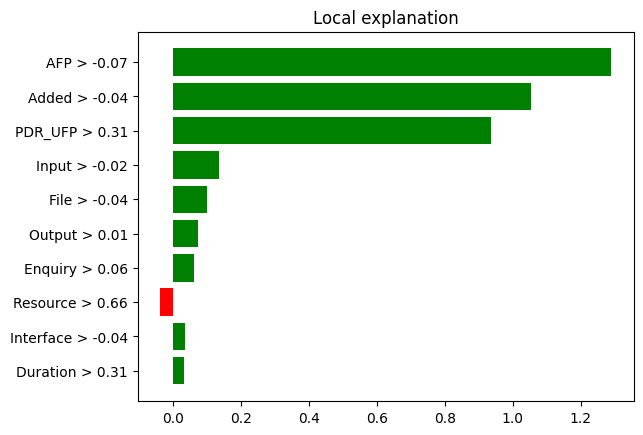

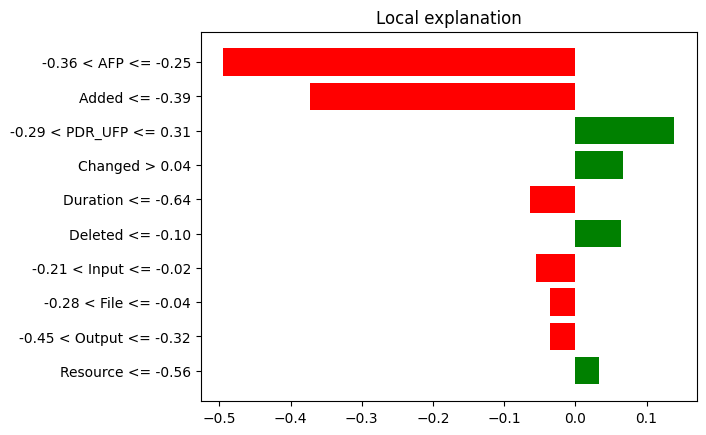

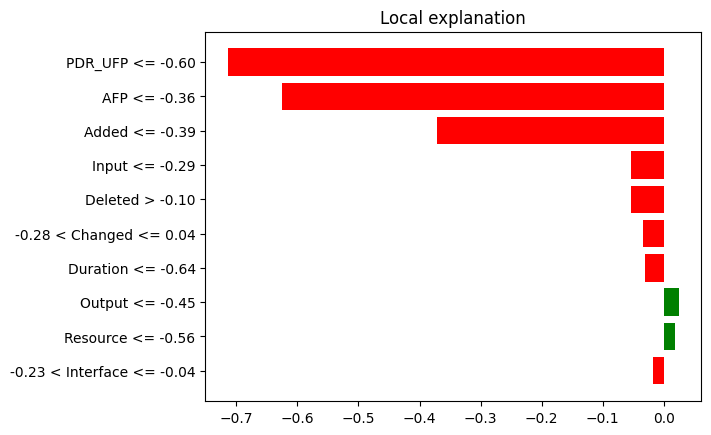

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 13])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(12)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

   Variable  Ranking     Signo
0     Added        1  Positivo
1       AFP        2  Positivo
2   PDR_UFP        3  Positivo
3   Enquiry        4  Negativo
4  Duration        5  Positivo
   Variable  Ranking     Signo
0       AFP        1  Positivo
1     Added        2  Positivo
2   PDR_UFP        3  Positivo
3  Duration        4  Positivo
4     Input        5  Positivo
  Variable  Ranking     Signo
0      AFP        1  Positivo
1    Added        2  Positivo
2  PDR_UFP        3  Positivo
3    Input        4  Positivo
4     File        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Added', 'AFP', 'PDR_UFP', 'Enquiry', 'Duration']
['AFP', 'Added', 'PDR_UFP', 'Duration', 'Input']
['AFP', 'Added', 'PDR_UFP', 'Input', 'File']
['AFP', 'Duration', 'Enquiry', 'Input', 'File', 'PDR_UFP', 'Added']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       AFP         2  Positivo       1  Positivo       1  Positivo
1  Duration         5  Positivo       4  Positivo       -         -
2   Enquiry         4  Negativo       -         -       -         -
3     Input         -         -       5  Positivo       4  Positivo
4      File         -         -       -         -       5  Positivo
5   PDR_UFP         3  Positivo       3  Positivo       3  Positivo
6     Added         1  Positivo       2  Positivo       2  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Added", "AFP", "PDR_UFP", "Enquiry", "Duration", "Input", "File"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
Added            1  Positivo       2  Positivo       2  Positivo
AFP              2  Positivo       1  Positivo       1  Positivo
PDR_UFP          3  Positivo       3  Positivo       3  Positivo
Enquiry          4  Negativo       -         -       -         -
Duration         5  Positivo       4  Positivo       -         -
Input            -         -       5  Positivo       4  Positivo
File             -         -       -         -       5  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 13])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(12)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[0, "Variable"]="AFP"
lime_df_median.at[2, "Variable"]="PDR_UFP"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

  Variable  Ranking     Signo
0  PDR_UFP        1  Negativo
1    Added        2  Negativo
2      AFP        3  Negativo
3   Output        4  Negativo
4  Enquiry        5  Positivo
  Variable  Ranking     Signo
0      AFP        1  Negativo
1  PDR_UFP        2  Negativo
2    Added        3  Negativo
3   Output        4  Negativo
4  Changed        5  Positivo
   Variable  Ranking     Signo
0       AFP        1  Negativo
1     Added        2  Negativo
2   PDR_UFP        3  Positivo
3   Changed        4  Positivo
4  Duration        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['PDR_UFP', 'Added', 'AFP', 'Output', 'Enquiry']
['AFP', 'PDR_UFP', 'Added', 'Output', 'Changed']
['AFP', 'Added', 'PDR_UFP', 'Changed', 'Duration']
['AFP', 'Duration', 'Enquiry', 'PDR_UFP', 'Added', 'Output', 'Changed']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       AFP         3  Negativo       1  Negativo       1  Negativo
1  Duration         -         -       -         -       5  Negativo
2   Enquiry         5  Positivo       -         -       -         -
3   PDR_UFP         1  Negativo       2  Negativo       3  Positivo
4     Added         2  Negativo       3  Negativo       2  Negativo
5    Output         4  Negativo       4  Negativo       -         -
6   Changed         -         -       5  Positivo       4  Positivo

In [ ]:
df_final_median.set_index('Variable', inplace=True)

nuevo_orden = ["PDR_UFP","Added", "AFP", "Output", "Enquiry", "Changed", "Duration"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
PDR_UFP          1  Negativo       2  Negativo       3  Positivo
Added            2  Negativo       3  Negativo       2  Negativo
AFP              3  Negativo       1  Negativo       1  Negativo
Output           4  Negativo       4  Negativo       -         -
Enquiry          5  Positivo       -         -       -         -
Changed          -         -       5  Positivo       4  Positivo
Duration         -         -       -         -       5  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 13])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(12)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

  Variable  Ranking     Signo
0      AFP        1  Negativo
1  PDR_UFP        2  Negativo
2    Added        3  Negativo
3    Input        4  Negativo
4     File        5  Negativo
  Variable  Ranking     Signo
0  PDR_UFP        1  Negativo
1      AFP        2  Negativo
2    Added        3  Negativo
3    Input        4  Negativo
4   Output        5  Negativo
  Variable  Ranking     Signo
0  PDR_UFP        1  Negativo
1      AFP        2  Negativo
2    Added        3  Negativo
3    Input        4  Negativo
4  Deleted        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['AFP', 'PDR_UFP', 'Added', 'Input', 'File']
['PDR_UFP', 'AFP', 'Added', 'Input', 'Output']
['PDR_UFP', 'AFP', 'Added', 'Input', 'Deleted']
['AFP', 'Input', 'File', 'PDR_UFP', 'Added', 'Output', 'Deleted']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0      AFP         1  Negativo       2  Negativo       2  Negativo
1    Input         4  Negativo       4  Negativo       4  Negativo
2     File         5  Negativo       -         -       -         -
3  PDR_UFP         2  Negativo       1  Negativo       1  Negativo
4    Added         3  Negativo       3  Negativo       3  Negativo
5   Output         -         -       5  Negativo       -         -
6  Deleted         -         -       -         -       5  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["AFP", "PDR_UFP", "Added", "Input", "File", "Output", "Deleted"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
AFP              1  Negativo       2  Negativo       2  Negativo
PDR_UFP          2  Negativo       1  Negativo       1  Negativo
Added            3  Negativo       3  Negativo       3  Negativo
Input            4  Negativo       4  Negativo       4  Negativo
File             5  Negativo       -         -       -         -
Output           -         -       5  Negativo       -         -
Deleted          -         -       -         -       5  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Added', 1), ('AFP', 2), ('PDR_UFP', 3), ('Enquiry', 4), ('Duration', 5), ('PDR_UFP', 1), ('Added', 2), ('AFP', 3), ('Output', 4), ('Enquiry', 5), ('AFP', 1), ('PDR_UFP', 2), ('Added', 3), ('Input', 4), ('File', 5)], 'Shapley': [('Added', 2), ('AFP', 1), ('PDR_UFP', 3), ('Duration', 4), ('Input', 5), ('PDR_UFP', 2), ('Added', 3), ('AFP', 1), ('Output', 4), ('Changed', 5), ('AFP', 2), ('PDR_UFP', 1), ('Added', 3), ('Input', 4), ('Output', 5)], 'Lime': [('Added', 2), ('AFP', 1), ('PDR_UFP', 3), ('Input', 4), ('File', 5), ('PDR_UFP', 3), ('Added', 2), ('AFP', 1), ('Changed', 4), ('Duration', 5), ('AFP', 2), ('PDR_UFP', 1), ('Added', 3), ('Input', 4), ('Deleted', 5)]}
{'Breakdown': {'Added': 3, 'AFP': 3, 'PDR_UFP': 3, 'Enquiry': 2, 'Duration': 1, 'Output': 1, 'Input': 1, 'File': 1}, 'Shapley': {'Added': 3, 'AFP': 3, 'PDR_UFP': 3, 'Duration': 1, 'Input': 2, 'Output': 2, 'Changed': 1}, 'Lime': {'Added': 3, 'AFP': 3, 'PDR_UFP': 3, 'Input': 2, 'File': 1, 'Changed': 1, 'Duration

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_rf = pd.DataFrame(data_dict, index=all_caract)

df_resumen_rf

Breakdown              Shapley                 Lime       
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
Changed              -      -           5.0      1           4.0      1
Deleted              -      -             -      -           5.0      1
Output             4.0      1           4.5      2             -      -
Added              2.0      3      2.666667      3      2.333333      3
PDR_UFP            2.0      3           2.0      3      2.333333      3
File               5.0      1             -      -           5.0      1
Input              4.0      1           4.5      2           4.0      2
Enquiry            4.5      2             -      -             -      -
Duration           5.0      1           4.0      1           5.0      1
AFP                2.0      3      1.333333      3      1.333333      3

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_rf[("General", "Conteo Total")] = df_resumen_rf[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_rf

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Changed              -      -           5.0      1           4.0      1   
Deleted              -      -             -      -           5.0      1   
Output             4.0      1           4.5      2             -      -   
Added              2.0      3      2.666667      3      2.333333      3   
PDR_UFP            2.0      3           2.0      3      2.333333      3   
File               5.0      1             -      -           5.0      1   
Input              4.0      1           4.5      2           4.0      2   
Enquiry            4.5      2             -      -             -      -   
Duration           5.0      1           4.0      1           5.0      1   
AFP                2.0      3      1.333333      3      1.333333      3   

           General               
           Ranking Conteo Total  
Changed   4.500000            2  
Deleted   5.000000            1  
Output    4.250000            3  
Added     2.333333            9  
PDR_UFP   2.111111            9  
File      5.000000            2  
Input     4.166667            5  
Enquiry   4.500000            2  
Duration  4.666667            3  
AFP       1.555556            9

In [ ]:
# Obtener el número de características
num_caract = df_resumen_rf.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_rf[("General", "Peso Rango")] = 1 - ((df_resumen_rf[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_rf[("General", "Peso Conteo")] = df_resumen_rf[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_rf[("General", "Puntaje")] = df_resumen_rf[("General", "Peso Rango")] + df_resumen_rf[("General", "Peso Conteo")]
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_rf.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_rf

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Changed              -      -           5.0      1           4.0      1   
Deleted              -      -             -      -           5.0      1   
Output             4.0      1           4.5      2             -      -   
Added              2.0      3      2.666667      3      2.333333      3   
PDR_UFP            2.0      3           2.0      3      2.333333      3   
File               5.0      1             -      -           5.0      1   
Input              4.0      1           4.5      2           4.0      2   
Enquiry            4.5      2             -      -             -      -   
Duration           5.0      1           4.0      1           5.0      1   
AFP                2.0      3      1.333333      3      1.333333      3   

         General               
         Ranking Conteo Total  
Changed      7.0            2  
Deleted     10.0            1  
Output       5.0            3  
Added        3.0            9  
PDR_UFP      2.0            9  
File         9.0            2  
Input        4.0            5  
Enquiry      7.0            2  
Duration     6.0            3  
AFP          1.0            9

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_rf.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_rf = df_resumen_rf[new_columns]

In [ ]:
df_resumen_rf.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_rf[(tech, "Ranking Medio")] = df_resumen_rf[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_rf

General                  Breakdown              Shapley         \
         Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
AFP          1.0            9          2.00      3          1.33      3   
PDR_UFP      2.0            9          2.00      3          2.00      3   
Added        3.0            9          2.00      3          2.67      3   
Input        4.0            5          4.00      1          4.50      2   
Output       5.0            3          4.00      1          4.50      2   
Duration     6.0            3          5.00      1          4.00      1   
Changed      7.0            2             -      -          5.00      1   
Enquiry      7.0            2          4.50      2             -      -   
File         9.0            2          5.00      1             -      -   
Deleted     10.0            1             -      -             -      -   

                  Lime         
         Ranking Medio Conteo  
AFP               1.33      3  
PDR_UFP           2.33      3  
Added             2.33      3  
Input             4.00      2  
Output               -      -  
Duration          5.00      1  
Changed           4.00      1  
Enquiry              -      -  
File              5.00      1  
Deleted           5.00      1

## **GradientBoostingRegresor:**

**FEATURE IMPORTANCE:**

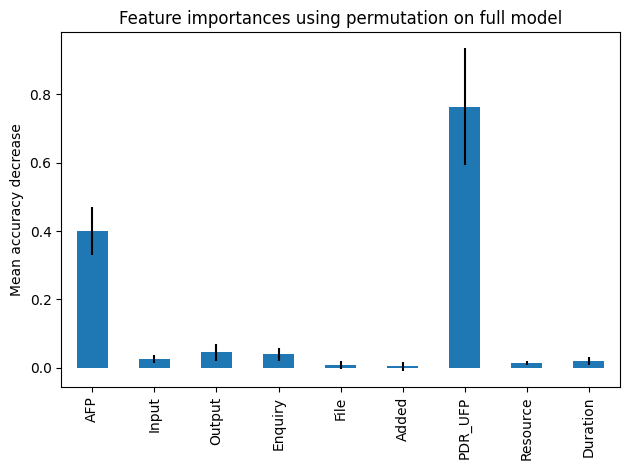

In [ ]:
#uso de permutation importance
permu = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

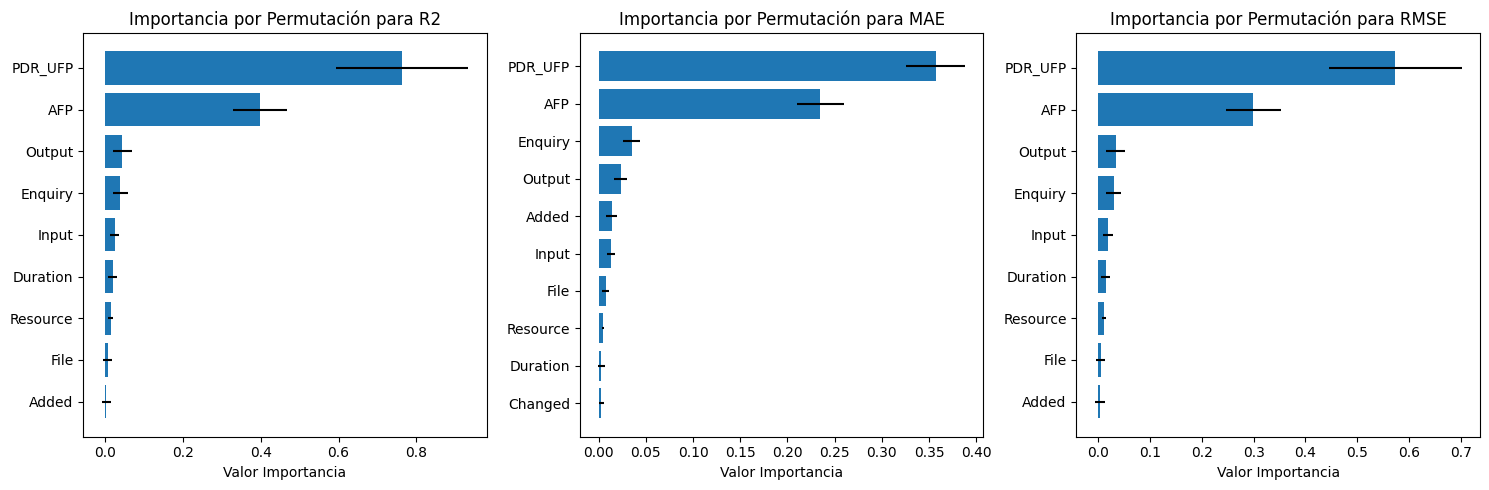

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_gbr = {}

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_gbr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_gbr['df_global_R2']

,Feature,Importance_Mean,Importance_Std
6,PDR_UFP,0.763569,0.170123
0,AFP,0.398545,0.070012
2,Output,0.044874,0.025067
3,Enquiry,0.039298,0.018994
1,Input,0.024892,0.012364
8,Duration,0.019367,0.011258
7,Resource,0.014166,0.005654
4,File,0.006599,0.011791
5,Added,0.003722,0.012533


In [ ]:
results_global_gbr['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
7,PDR_UFP,0.356878,0.031249
0,AFP,0.234847,0.024958
3,Enquiry,0.034888,0.008671
2,Output,0.023256,0.006688
5,Added,0.013835,0.005590
1,Input,0.013264,0.004521
4,File,0.007523,0.003893
8,Resource,0.004640,0.001353
9,Duration,0.002934,0.003390
6,Changed,0.002838,0.002578


In [ ]:
results_global_gbr['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
6,PDR_UFP,0.573674,0.127814
0,AFP,0.299429,0.052600
2,Output,0.033714,0.018833
3,Enquiry,0.029525,0.014270
1,Input,0.018701,0.009289
8,Duration,0.014550,0.008458
7,Resource,0.010643,0.004248
4,File,0.004958,0.008858
5,Added,0.002796,0.009416


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_gbr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 349 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 349 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7b4830fd6dd0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.589, mean = 0.0211, max = 6.33
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0381, mean = 0.0186, max = 1.5
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  89
El valor máximo obtenido es:  3.6340946965349423
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  39
El valor mínimo obtenido es:  -0.5774769083082552
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  49
El valor de la mediana es:  -0.3667480092490827


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

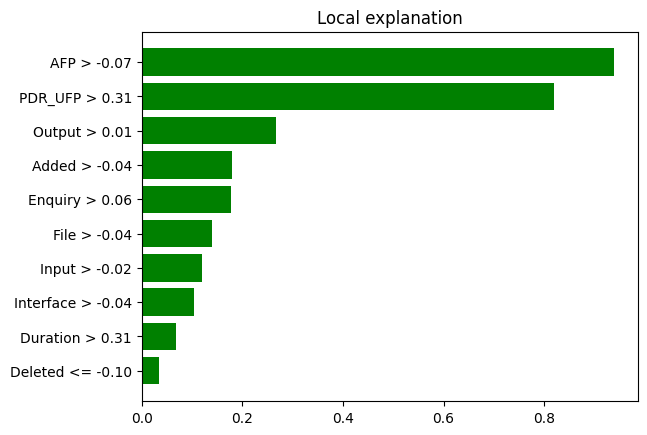

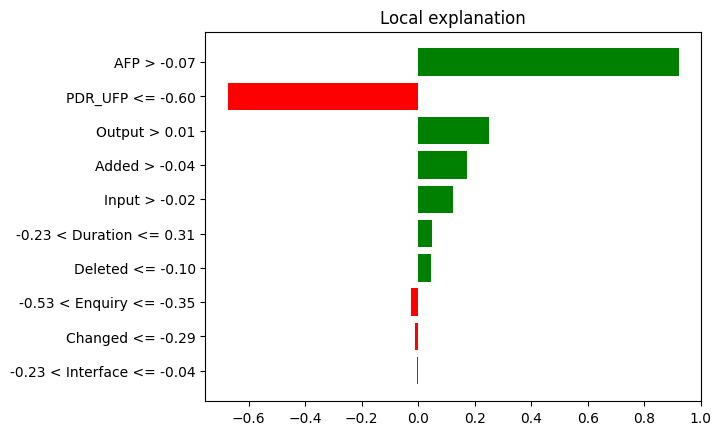

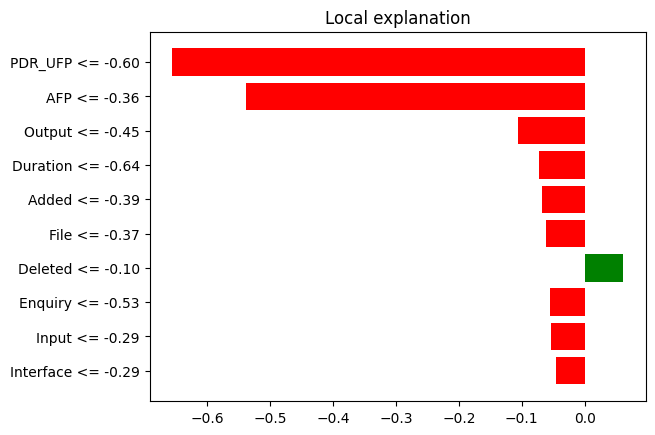

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 13])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(12)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

    Variable  Ranking     Signo
0        AFP        1  Positivo
1    PDR_UFP        2  Positivo
2     Output        3  Positivo
3    Enquiry        4  Positivo
4  Interface        5  Positivo
    Variable  Ranking     Signo
0        AFP        1  Positivo
1    PDR_UFP        2  Positivo
2     Output        3  Positivo
3       File        4  Positivo
4  Interface        5  Positivo
  Variable  Ranking     Signo
0      AFP        1  Positivo
1  PDR_UFP        2  Positivo
2   Output        3  Positivo
3    Added        4  Positivo
4  Enquiry        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['AFP', 'PDR_UFP', 'Output', 'Enquiry', 'Interface']
['AFP', 'PDR_UFP', 'Output', 'File', 'Interface']
['AFP', 'PDR_UFP', 'Output', 'Added', 'Enquiry']
['AFP', 'Interface', 'Enquiry', 'File', 'PDR_UFP', 'Added', 'Output']


Variable Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
0        AFP         1  Positivo       1  Positivo       1  Positivo
1  Interface         5  Positivo       5  Positivo       -         -
2    Enquiry         4  Positivo       -         -       5  Positivo
3       File         -         -       4  Positivo       -         -
4    PDR_UFP         2  Positivo       2  Positivo       2  Positivo
5      Added         -         -       -         -       4  Positivo
6     Output         3  Positivo       3  Positivo       3  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["AFP", "PDR_UFP", "Output", "Enquiry", "Interface", "File", "Added"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
            Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                         
AFP               1  Positivo       1  Positivo       1  Positivo
PDR_UFP           2  Positivo       2  Positivo       2  Positivo
Output            3  Positivo       3  Positivo       3  Positivo
Enquiry           4  Positivo       -         -       5  Positivo
Interface         5  Positivo       5  Positivo       -         -
File              -         -       4  Positivo       -         -
Added             -         -       -         -       4  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 13])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(12)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

    Variable  Ranking     Signo
0    PDR_UFP        1  Negativo
1        AFP        2  Positivo
2    Enquiry        3  Negativo
3  Interface        4  Negativo
4     Output        5  Positivo
    Variable  Ranking     Signo
0    PDR_UFP        1  Negativo
1       File        2  Negativo
2        AFP        3  Positivo
3      Input        4  Negativo
4  Interface        5  Negativo
  Variable  Ranking     Signo
0      AFP        1  Positivo
1  PDR_UFP        2  Negativo
2   Output        3  Positivo
3    Added        4  Positivo
4    Input        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['PDR_UFP', 'AFP', 'Enquiry', 'Interface', 'Output']
['PDR_UFP', 'File', 'AFP', 'Input', 'Interface']
['AFP', 'PDR_UFP', 'Output', 'Added', 'Input']
['AFP', 'Interface', 'Enquiry', 'Input', 'File', 'PDR_UFP', 'Added', 'Output']


Variable Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
0        AFP         2  Positivo       3  Positivo       1  Positivo
1  Interface         4  Negativo       5  Negativo       -         -
2    Enquiry         3  Negativo       -         -       -         -
3      Input         -         -       4  Negativo       5  Positivo
4       File         -         -       2  Negativo       -         -
5    PDR_UFP         1  Negativo       1  Negativo       2  Negativo
6      Added         -         -       -         -       4  Positivo
7     Output         5  Positivo       -         -       3  Positivo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["PDR_UFP", "AFP", "Enquiry", "Interface", "Output", "File", "Input", "Added"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
            Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                         
PDR_UFP           1  Negativo       1  Negativo       2  Negativo
AFP               2  Positivo       3  Positivo       1  Positivo
Enquiry           3  Negativo       -         -       -         -
Interface         4  Negativo       5  Negativo       -         -
Output            5  Positivo       -         -       3  Positivo
File              -         -       2  Negativo       -         -
Input             -         -       4  Negativo       5  Positivo
Added             -         -       -         -       4  Positivo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 13])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(12)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

  Variable  Ranking     Signo
0      AFP        1  Negativo
1    Input        2  Negativo
2  PDR_UFP        3  Negativo
3    Added        4  Negativo
4     File        5  Negativo
  Variable  Ranking     Signo
0  PDR_UFP        1  Negativo
1      AFP        2  Negativo
2   Output        3  Negativo
3    Input        4  Negativo
4    Added        5  Negativo
   Variable  Ranking     Signo
0   PDR_UFP        1  Negativo
1       AFP        2  Negativo
2    Output        3  Negativo
3  Duration        4  Negativo
4     Added        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['AFP', 'Input', 'PDR_UFP', 'Added', 'File']
['PDR_UFP', 'AFP', 'Output', 'Input', 'Added']
['PDR_UFP', 'AFP', 'Output', 'Duration', 'Added']
['AFP', 'Duration', 'Input', 'File', 'PDR_UFP', 'Added', 'Output']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       AFP         1  Negativo       2  Negativo       2  Negativo
1  Duration         -         -       -         -       4  Negativo
2     Input         2  Negativo       4  Negativo       -         -
3      File         5  Negativo       -         -       -         -
4   PDR_UFP         3  Negativo       1  Negativo       1  Negativo
5     Added         4  Negativo       5  Negativo       5  Negativo
6    Output         -         -       3  Negativo       3  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["AFP", "Input", "PDR_UFP", "Added", "File", "Output", "Duration"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
AFP              1  Negativo       2  Negativo       2  Negativo
Input            2  Negativo       4  Negativo       -         -
PDR_UFP          3  Negativo       1  Negativo       1  Negativo
Added            4  Negativo       5  Negativo       5  Negativo
File             5  Negativo       -         -       -         -
Output           -         -       3  Negativo       3  Negativo
Duration         -         -       -         -       4  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('AFP', 1), ('PDR_UFP', 2), ('Output', 3), ('Enquiry', 4), ('Interface', 5), ('PDR_UFP', 1), ('AFP', 2), ('Enquiry', 3), ('Interface', 4), ('Output', 5), ('AFP', 1), ('Input', 2), ('PDR_UFP', 3), ('Added', 4), ('File', 5)], 'Shapley': [('AFP', 1), ('PDR_UFP', 2), ('Output', 3), ('Interface', 5), ('File', 4), ('PDR_UFP', 1), ('AFP', 3), ('Interface', 5), ('File', 2), ('Input', 4), ('AFP', 2), ('Input', 4), ('PDR_UFP', 1), ('Added', 5), ('Output', 3)], 'Lime': [('AFP', 1), ('PDR_UFP', 2), ('Output', 3), ('Enquiry', 5), ('Added', 4), ('PDR_UFP', 2), ('AFP', 1), ('Output', 3), ('Input', 5), ('Added', 4), ('AFP', 2), ('PDR_UFP', 1), ('Added', 5), ('Output', 3), ('Duration', 4)]}
{'Breakdown': {'AFP': 3, 'PDR_UFP': 3, 'Output': 2, 'Enquiry': 2, 'Interface': 2, 'Input': 1, 'Added': 1, 'File': 1}, 'Shapley': {'AFP': 3, 'PDR_UFP': 3, 'Output': 2, 'Interface': 2, 'File': 2, 'Input': 2, 'Added': 1}, 'Lime': {'AFP': 3, 'PDR_UFP': 3, 'Output': 3, 'Enquiry': 1, 'Added': 3, 'Input': 1,

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_gbr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_gbr

Breakdown              Shapley                 Lime       
          Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
Output              4.0      2           3.0      2           3.0      3
Added               4.0      1           5.0      1      4.333333      3
PDR_UFP             2.0      3      1.333333      3      1.666667      3
File                5.0      1           3.0      2             -      -
Input               2.0      1           4.0      2           5.0      1
Enquiry             3.5      2             -      -           5.0      1
Interface           4.5      2           5.0      2             -      -
Duration              -      -             -      -           4.0      1
AFP            1.333333      3           2.0      3      1.333333      3

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_gbr[("General", "Conteo Total")] = df_resumen_gbr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_gbr

Breakdown              Shapley                 Lime         \
          Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Output              4.0      2           3.0      2           3.0      3   
Added               4.0      1           5.0      1      4.333333      3   
PDR_UFP             2.0      3      1.333333      3      1.666667      3   
File                5.0      1           3.0      2             -      -   
Input               2.0      1           4.0      2           5.0      1   
Enquiry             3.5      2             -      -           5.0      1   
Interface           4.5      2           5.0      2             -      -   
Duration              -      -             -      -           4.0      1   
AFP            1.333333      3           2.0      3      1.333333      3   

            General               
            Ranking Conteo Total  
Output     3.333333            7  
Added      4.444444            5  
PDR_UFP    1.666667            9  
File       4.000000            3  
Input      3.666667            4  
Enquiry    4.250000            3  
Interface  4.750000            4  
Duration   4.000000            1  
AFP        1.555556            9

In [ ]:
# Obtener el número de características
num_caract = df_resumen_gbr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_gbr[("General", "Peso Rango")] = 1 - ((df_resumen_gbr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_gbr[("General", "Peso Conteo")] = df_resumen_gbr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_gbr[("General", "Puntaje")] = df_resumen_gbr[("General", "Peso Rango")] + df_resumen_gbr[("General", "Peso Conteo")]
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_gbr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_gbr

Breakdown              Shapley                 Lime         \
          Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Output              4.0      2           3.0      2           3.0      3   
Added               4.0      1           5.0      1      4.333333      3   
PDR_UFP             2.0      3      1.333333      3      1.666667      3   
File                5.0      1           3.0      2             -      -   
Input               2.0      1           4.0      2           5.0      1   
Enquiry             3.5      2             -      -           5.0      1   
Interface           4.5      2           5.0      2             -      -   
Duration              -      -             -      -           4.0      1   
AFP            1.333333      3           2.0      3      1.333333      3   

          General               
          Ranking Conteo Total  
Output        3.0            7  
Added         5.0            5  
PDR_UFP       2.0            9  
File          6.0            3  
Input         4.0            4  
Enquiry       7.0            3  
Interface     7.0            4  
Duration      7.0            1  
AFP           1.0            9

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_gbr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_gbr = df_resumen_gbr[new_columns]

In [ ]:
df_resumen_gbr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_gbr[(tech, "Ranking Medio")] = df_resumen_gbr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_gbr

General                  Breakdown              Shapley         \
          Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
AFP           1.0            9          1.33      3          2.00      3   
PDR_UFP       2.0            9          2.00      3          1.33      3   
Output        3.0            7          4.00      2          3.00      2   
Input         4.0            4          2.00      1          4.00      2   
Added         5.0            5          4.00      1          5.00      1   
File          6.0            3          5.00      1          3.00      2   
Enquiry       7.0            3          3.50      2             -      -   
Interface     7.0            4          4.50      2          5.00      2   
Duration      7.0            1             -      -             -      -   

                   Lime         
          Ranking Medio Conteo  
AFP                1.33      3  
PDR_UFP            1.67      3  
Output             3.00      3  
Input              5.00      1  
Added              4.33      3  
File                  -      -  
Enquiry            5.00      1  
Interface             -      -  
Duration           4.00      1

## **Voting:**

**FEATURE IMPORTANCE:**

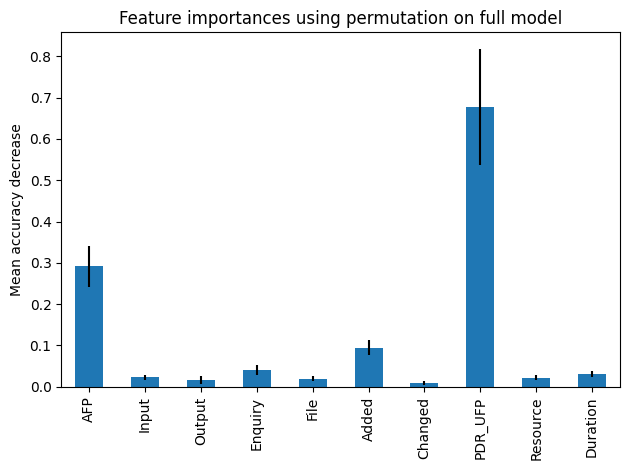

In [ ]:
#uso de permutation importance
permu = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

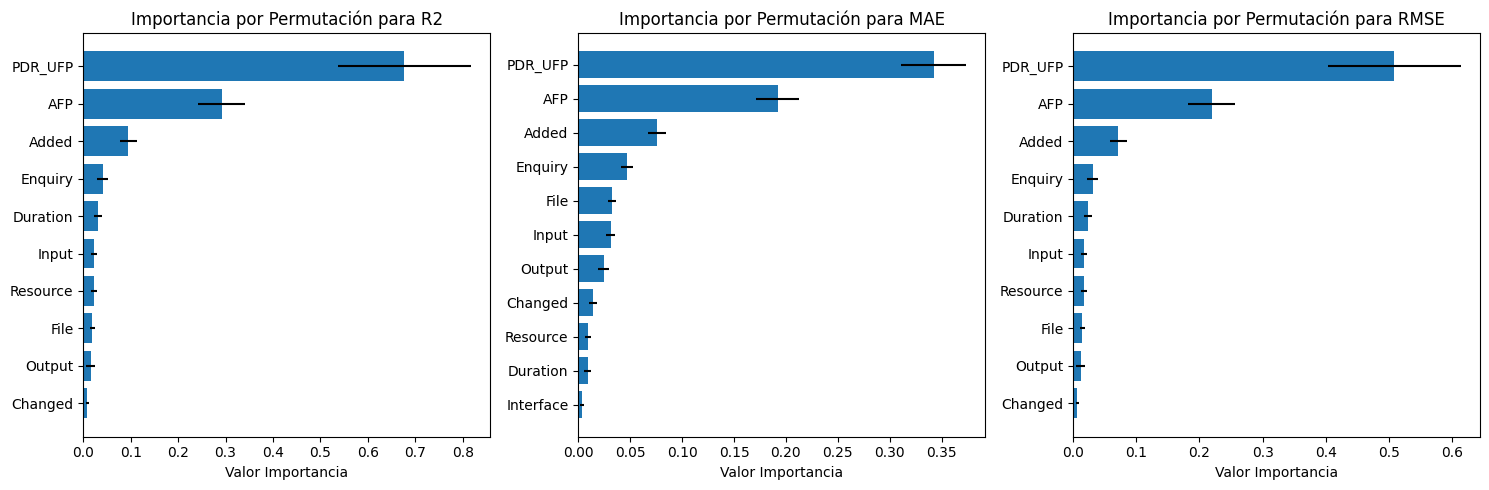

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_vot = {}

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_vot[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_vot['df_global_R2']

,Feature,Importance_Mean,Importance_Std
7,PDR_UFP,0.676666,0.140192
0,AFP,0.292080,0.049768
5,Added,0.094987,0.018291
3,Enquiry,0.040931,0.012152
9,Duration,0.030846,0.008057
1,Input,0.023146,0.006322
8,Resource,0.022257,0.005978
4,File,0.019318,0.005975
2,Output,0.015562,0.009573
6,Changed,0.008963,0.003868


In [ ]:
results_global_vot['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
8,PDR_UFP,0.342097,0.030931
0,AFP,0.192034,0.020473
6,Added,0.076097,0.008637
3,Enquiry,0.046882,0.005730
4,File,0.032365,0.003742
1,Input,0.031159,0.004406
2,Output,0.024771,0.005247
7,Changed,0.014023,0.003911
9,Resource,0.009399,0.002742
10,Duration,0.009131,0.003498


In [ ]:
results_global_vot['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
7,PDR_UFP,0.508383,0.105327
0,AFP,0.219441,0.037391
5,Added,0.071364,0.013742
3,Enquiry,0.030752,0.009130
9,Duration,0.023175,0.006053
1,Input,0.017390,0.004749
8,Resource,0.016722,0.004491
4,File,0.014514,0.004489
2,Output,0.011692,0.007192
6,Changed,0.006734,0.002906


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_voting, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 349 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 349 values
  -> model_class       : sklearn.ensemble._voting.VotingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7b4830fd6dd0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.602, mean = 0.03, max = 6.65
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.257, mean = 0.00963, max = 1.18
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  124
El valor máximo obtenido es:  3.717148535836612
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  26
El valor mínimo obtenido es:  -0.5786294664957113
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  93
El valor de la mediana es:  -0.3375192987418893


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

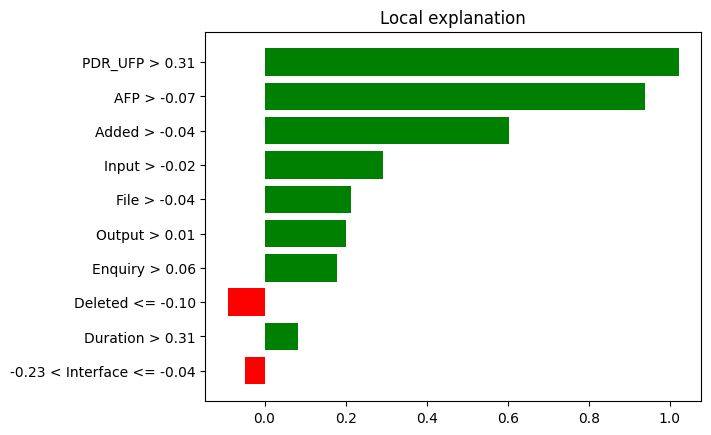

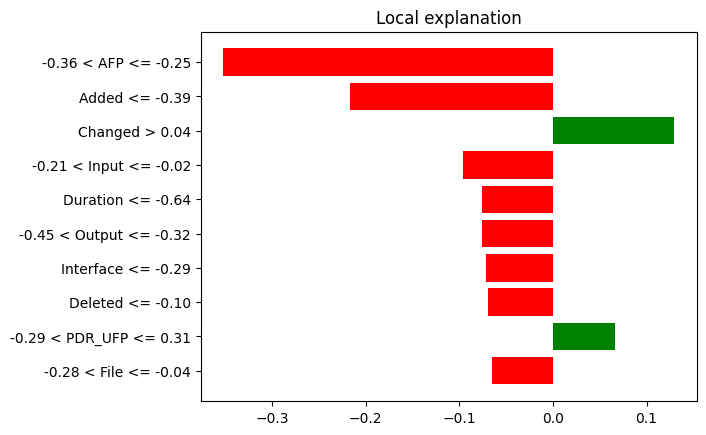

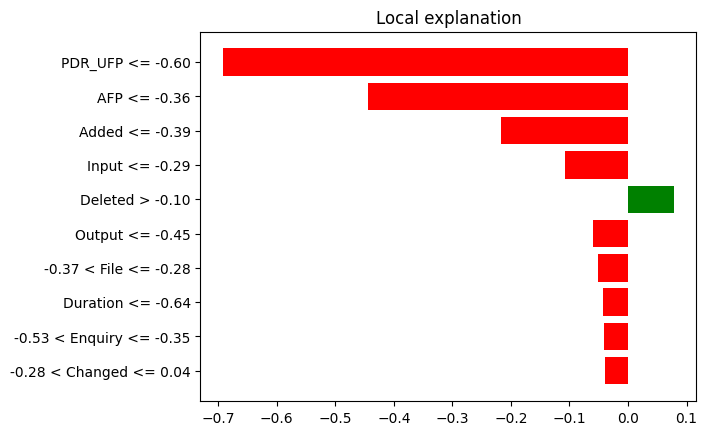

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 13])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(12)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

   Variable  Ranking     Signo
0   PDR_UFP        1  Positivo
1       AFP        2  Positivo
2  Duration        3  Positivo
3   Enquiry        4  Positivo
4     Added        5  Positivo
   Variable  Ranking     Signo
0       AFP        1  Positivo
1   Enquiry        2  Positivo
2   PDR_UFP        3  Positivo
3     Added        4  Positivo
4  Duration        5  Positivo
  Variable  Ranking     Signo
0  PDR_UFP        1  Positivo
1      AFP        2  Positivo
2    Added        3  Positivo
3    Input        4  Positivo
4     File        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['PDR_UFP', 'AFP', 'Duration', 'Enquiry', 'Added']
['AFP', 'Enquiry', 'PDR_UFP', 'Added', 'Duration']
['PDR_UFP', 'AFP', 'Added', 'Input', 'File']
['AFP', 'Duration', 'Enquiry', 'Input', 'File', 'PDR_UFP', 'Added']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       AFP         2  Positivo       1  Positivo       2  Positivo
1  Duration         3  Positivo       5  Positivo       -         -
2   Enquiry         4  Positivo       2  Positivo       -         -
3     Input         -         -       -         -       4  Positivo
4      File         -         -       -         -       5  Positivo
5   PDR_UFP         1  Positivo       3  Positivo       1  Positivo
6     Added         5  Positivo       4  Positivo       3  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["PDR_UFP", "AFP", "Duration", "Enquiry", "Added", "Input", "File"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
PDR_UFP          1  Positivo       3  Positivo       1  Positivo
AFP              2  Positivo       1  Positivo       2  Positivo
Duration         3  Positivo       5  Positivo       -         -
Enquiry          4  Positivo       2  Positivo       -         -
Added            5  Positivo       4  Positivo       3  Positivo
Input            -         -       -         -       4  Positivo
File             -         -       -         -       5  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 13])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(12)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[0, "Variable"] = "AFP"
lime_df_median.at[3, "Variable"] = "Input"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

  Variable  Ranking     Signo
0      AFP        1  Negativo
1    Added        2  Negativo
2  PDR_UFP        3  Negativo
3   Output        4  Negativo
4  Changed        5  Positivo
  Variable  Ranking     Signo
0      AFP        1  Negativo
1  PDR_UFP        2  Negativo
2    Added        3  Negativo
3   Output        4  Negativo
4  Changed        5  Positivo
   Variable  Ranking     Signo
0       AFP        1  Negativo
1     Added        2  Negativo
2   Changed        3  Positivo
3     Input        4  Negativo
4  Duration        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['AFP', 'Added', 'PDR_UFP', 'Output', 'Changed']
['AFP', 'PDR_UFP', 'Added', 'Output', 'Changed']
['AFP', 'Added', 'Changed', 'Input', 'Duration']
['AFP', 'Duration', 'Input', 'PDR_UFP', 'Added', 'Output', 'Changed']


Variable Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
0       AFP         1  Negativo       1  Negativo       1  Negativo
1  Duration         -         -       -         -       5  Negativo
2     Input         -         -       -         -       4  Negativo
3   PDR_UFP         3  Negativo       2  Negativo       -         -
4     Added         2  Negativo       3  Negativo       2  Negativo
5    Output         4  Negativo       4  Negativo       -         -
6   Changed         5  Positivo       5  Positivo       3  Positivo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["AFP", "Added", "PDR_UFP", "Output", "Changed", "Input", "Duration"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
AFP              1  Negativo       1  Negativo       1  Negativo
Added            2  Negativo       3  Negativo       2  Negativo
PDR_UFP          3  Negativo       2  Negativo       -         -
Output           4  Negativo       4  Negativo       -         -
Changed          5  Positivo       5  Positivo       3  Positivo
Input            -         -       -         -       4  Negativo
Duration         -         -       -         -       5  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 13])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(12)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

  Variable  Ranking     Signo
0      AFP        1  Negativo
1  PDR_UFP        2  Negativo
2    Added        3  Negativo
3    Input        4  Negativo
4   Output        5  Negativo
  Variable  Ranking     Signo
0  PDR_UFP        1  Negativo
1      AFP        2  Negativo
2    Added        3  Negativo
3   Output        4  Negativo
4    Input        5  Negativo
  Variable  Ranking     Signo
0  PDR_UFP        1  Negativo
1      AFP        2  Negativo
2    Added        3  Negativo
3    Input        4  Negativo
4  Deleted        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['AFP', 'PDR_UFP', 'Added', 'Input', 'Output']
['PDR_UFP', 'AFP', 'Added', 'Output', 'Input']
['PDR_UFP', 'AFP', 'Added', 'Input', 'Deleted']
['AFP', 'Input', 'PDR_UFP', 'Added', 'Output', 'Deleted']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0      AFP         1  Negativo       2  Negativo       2  Negativo
1    Input         4  Negativo       5  Negativo       4  Negativo
2  PDR_UFP         2  Negativo       1  Negativo       1  Negativo
3    Added         3  Negativo       3  Negativo       3  Negativo
4   Output         5  Negativo       4  Negativo       -         -
5  Deleted         -         -       -         -       5  Positivo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["AFP", "PDR_UFP", "Added", "Input", "Output", "Deleted"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
AFP              1  Negativo       2  Negativo       2  Negativo
PDR_UFP          2  Negativo       1  Negativo       1  Negativo
Added            3  Negativo       3  Negativo       3  Negativo
Input            4  Negativo       5  Negativo       4  Negativo
Output           5  Negativo       4  Negativo       -         -
Deleted          -         -       -         -       5  Positivo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('PDR_UFP', 1), ('AFP', 2), ('Duration', 3), ('Enquiry', 4), ('Added', 5), ('AFP', 1), ('Added', 2), ('PDR_UFP', 3), ('Output', 4), ('Changed', 5), ('AFP', 1), ('PDR_UFP', 2), ('Added', 3), ('Input', 4), ('Output', 5)], 'Shapley': [('PDR_UFP', 3), ('AFP', 1), ('Duration', 5), ('Enquiry', 2), ('Added', 4), ('AFP', 1), ('Added', 3), ('PDR_UFP', 2), ('Output', 4), ('Changed', 5), ('AFP', 2), ('PDR_UFP', 1), ('Added', 3), ('Input', 5), ('Output', 4)], 'Lime': [('PDR_UFP', 1), ('AFP', 2), ('Added', 3), ('Input', 4), ('File', 5), ('AFP', 1), ('Added', 2), ('Changed', 3), ('Input', 4), ('Duration', 5), ('AFP', 2), ('PDR_UFP', 1), ('Added', 3), ('Input', 4), ('Deleted', 5)]}
{'Breakdown': {'PDR_UFP': 3, 'AFP': 3, 'Duration': 1, 'Enquiry': 1, 'Added': 3, 'Output': 2, 'Changed': 1, 'Input': 1}, 'Shapley': {'PDR_UFP': 3, 'AFP': 3, 'Duration': 1, 'Enquiry': 1, 'Added': 3, 'Output': 2, 'Changed': 1, 'Input': 1}, 'Lime': {'PDR_UFP': 2, 'AFP': 3, 'Added': 3, 'Input': 3, 'File': 1, 'Cha

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_vot = pd.DataFrame(data_dict, index=all_caract)

df_resumen_vot

Breakdown              Shapley                 Lime       
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
Changed            5.0      1           5.0      1           3.0      1
Deleted              -      -             -      -           5.0      1
Output             4.5      2           4.0      2             -      -
Added         3.333333      3      3.333333      3      2.666667      3
PDR_UFP            2.0      3           2.0      3           1.0      2
File                 -      -             -      -           5.0      1
Input              4.0      1           5.0      1           4.0      3
Enquiry            4.0      1           2.0      1             -      -
Duration           3.0      1           5.0      1           5.0      1
AFP           1.333333      3      1.333333      3      1.666667      3

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_vot[("General", "Conteo Total")] = df_resumen_vot[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_vot

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Changed            5.0      1           5.0      1           3.0      1   
Deleted              -      -             -      -           5.0      1   
Output             4.5      2           4.0      2             -      -   
Added         3.333333      3      3.333333      3      2.666667      3   
PDR_UFP            2.0      3           2.0      3           1.0      2   
File                 -      -             -      -           5.0      1   
Input              4.0      1           5.0      1           4.0      3   
Enquiry            4.0      1           2.0      1             -      -   
Duration           3.0      1           5.0      1           5.0      1   
AFP           1.333333      3      1.333333      3      1.666667      3   

           General               
           Ranking Conteo Total  
Changed   4.333333            3  
Deleted   5.000000            1  
Output    4.250000            4  
Added     3.111111            9  
PDR_UFP   1.666667            8  
File      5.000000            1  
Input     4.333333            5  
Enquiry   3.000000            2  
Duration  4.333333            3  
AFP       1.444444            9

In [ ]:
# Obtener el número de características
num_caract = df_resumen_vot.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_vot[("General", "Peso Rango")] = 1 - ((df_resumen_vot[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_vot[("General", "Peso Conteo")] = df_resumen_vot[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_vot[("General", "Puntaje")] = df_resumen_vot[("General", "Peso Rango")] + df_resumen_vot[("General", "Peso Conteo")]
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_vot.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_vot

Breakdown              Shapley                 Lime         \
         Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Changed            5.0      1           5.0      1           3.0      1   
Deleted              -      -             -      -           5.0      1   
Output             4.5      2           4.0      2             -      -   
Added         3.333333      3      3.333333      3      2.666667      3   
PDR_UFP            2.0      3           2.0      3           1.0      2   
File                 -      -             -      -           5.0      1   
Input              4.0      1           5.0      1           4.0      3   
Enquiry            4.0      1           2.0      1             -      -   
Duration           3.0      1           5.0      1           5.0      1   
AFP           1.333333      3      1.333333      3      1.666667      3   

         General               
         Ranking Conteo Total  
Changed      7.0            3  
Deleted      9.0            1  
Output       4.0            4  
Added        3.0            9  
PDR_UFP      2.0            8  
File         9.0            1  
Input        5.0            5  
Enquiry      5.0            2  
Duration     7.0            3  
AFP          1.0            9

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_vot.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_vot = df_resumen_vot[new_columns]

In [ ]:
df_resumen_vot.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_vot[(tech, "Ranking Medio")] = df_resumen_vot[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_vot

General                  Breakdown              Shapley         \
         Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
AFP          1.0            9          1.33      3          1.33      3   
PDR_UFP      2.0            8          2.00      3          2.00      3   
Added        3.0            9          3.33      3          3.33      3   
Output       4.0            4          4.50      2          4.00      2   
Input        5.0            5          4.00      1          5.00      1   
Enquiry      5.0            2          4.00      1          2.00      1   
Changed      7.0            3          5.00      1          5.00      1   
Duration     7.0            3          3.00      1          5.00      1   
Deleted      9.0            1             -      -             -      -   
File         9.0            1             -      -             -      -   

                  Lime         
         Ranking Medio Conteo  
AFP               1.67      3  
PDR_UFP           1.00      2  
Added             2.67      3  
Output               -      -  
Input             4.00      3  
Enquiry              -      -  
Changed           3.00      1  
Duration          5.00      1  
Deleted           5.00      1  
File              5.00      1

## Local Datasets

In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un nuevo DataFrame para el resultado final
df_resumen_final = pd.DataFrame()

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

for df_resumen in dfs_resumen:
    for index, row in df_resumen.iterrows():
        if index not in df_resumen_final.index:
            df_resumen_final.loc[index, :] = '-'

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final[("Conteo Final")] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")


# Eliminar la subcolumnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

# Rellenar los valores NaN con "-"
df_resumen_final = df_resumen_final.fillna("-")

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

df_resumen_final

,"(SVR, Ranking)","(SVR, Conteo Total)","(RF, Ranking)","(RF, Conteo Total)","(GBR, Ranking)","(GBR, Conteo Total)","(VOT, Ranking)","(VOT, Conteo Total)",Ranking Final,Conteo Final
PDR_UFP,1.0,8,2.0,9.0,2.0,9.0,2.0,8.0,1.0,34.0
AFP,8.0,4,1.0,9.0,1.0,9.0,1.0,9.0,2.0,31.0
Added,2.0,8,3.0,9.0,5.0,5.0,3.0,9.0,3.0,31.0
Output,3.0,4,5.0,3.0,3.0,7.0,4.0,4.0,4.0,18.0
Input,9.0,4,4.0,5.0,4.0,4.0,5.0,5.0,5.0,18.0
Enquiry,5.0,4,7.0,2.0,7.0,3.0,5.0,2.0,6.0,11.0
Duration,7.0,2,6.0,3.0,7.0,1.0,7.0,3.0,7.0,9.0
File,10.0,4,9.0,2.0,6.0,3.0,9.0,1.0,8.0,10.0
Resource,6.0,1,-,-,-,-,-,-,9.0,1.0
Changed,11.0,1,7.0,2.0,-,-,7.0,3.0,10.0,6.0


In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un nuevo DataFrame para el resultado final
df_resumen_final = pd.DataFrame()

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

for df_resumen in dfs_resumen:
    for index, row in df_resumen.iterrows():
        if index not in df_resumen_final.index:
            df_resumen_final.loc[index, :] = '-'

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final[("Conteo Final")] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")


# Eliminar la subcolumnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

# Rellenar los valores NaN con "-"
df_resumen_final = df_resumen_final.fillna("-")

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

# Formatear los valores
for algo in algorithms:
    df_resumen_final[(algo, "Ranking")] = df_resumen_final[(algo, "Ranking")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
    df_resumen_final[(algo, "Conteo Total")] = df_resumen_final[(algo, "Conteo Total")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final[("Ranking Final")] = df_resumen_final[("Ranking Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
df_resumen_final[("Conteo Final")] = df_resumen_final[("Conteo Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final

,"(SVR, Ranking)","(SVR, Conteo Total)","(RF, Ranking)","(RF, Conteo Total)","(GBR, Ranking)","(GBR, Conteo Total)","(VOT, Ranking)","(VOT, Conteo Total)",Ranking Final,Conteo Final
PDR_UFP,1,8,2,9,2,9,2,8,1,34
AFP,8,4,1,9,1,9,1,9,2,31
Added,2,8,3,9,5,5,3,9,3,31
Output,3,4,5,3,3,7,4,4,4,18
Input,9,4,4,5,4,4,5,5,5,18
Enquiry,5,4,7,2,7,3,5,2,6,11
Duration,7,2,6,3,7,1,7,3,7,9
File,10,4,9,2,6,3,9,1,8,10
Resource,6,1,-,-,-,-,-,-,9,1
Changed,11,1,7,2,-,-,7,3,10,6


# **Resultados:**

In [ ]:
score_result=score_result.drop("MSE",axis=1)

In [ ]:
score_result

,Modelo,MAE,RMSE,R2,MMRE,PRED(0.25)
0,SVR,0.172808,0.527653,0.696184,0.457349,0.863758
1,RandomForest,0.126184,0.391675,0.835818,0.058441,0.853758
2,GradienBoosting,0.124252,0.390512,0.836132,0.023265,0.861737
3,Voting,0.124042,0.409358,0.821230,0.169514,0.887818


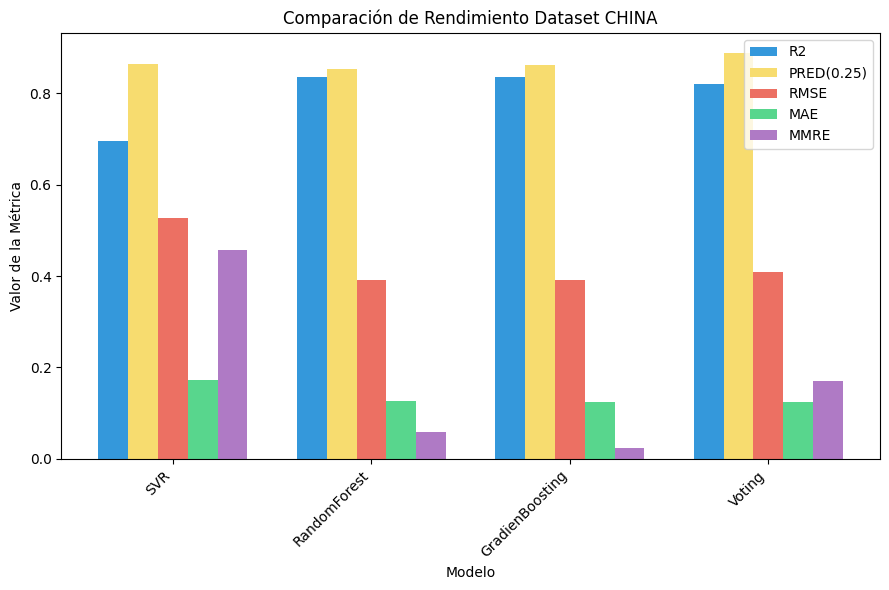

In [ ]:
metricas = ['R2', 'PRED(0.25)', 'RMSE', 'MAE', 'MMRE']
colores = ['#3498DB', '#F7DC6F','#EC7063', '#58D68D', '#AF7AC5']

num_modelos = len(score_result)
ancho_barra = 0.15
x = range(num_modelos)

plt.figure(figsize=(9, 6))

# Crear un gráfico de barras para cada métrica
for i, metrica in enumerate(metricas):
    # Calcular la posición para las barras de esta métrica
    posiciones_x = [pos + i * ancho_barra for pos in x]

    # Obtener los valores de la métrica actual
    valores_metrica = score_result[metrica]

    # Crear las barras para la métrica actual
    plt.bar(
        posiciones_x,
        valores_metrica,
        width=ancho_barra,
        label=metrica,
        color=colores[i],
    )

# Personalizar el gráfico
plt.xlabel('Modelo')
plt.ylabel('Valor de la Métrica')
plt.title('Comparación de Rendimiento Dataset CHINA')
plt.xticks([pos + (len(metricas) - 1) * ancho_barra / 2 for pos in x], score_result['Modelo'], rotation=45, ha="right")
plt.legend(loc='upper right')

# Mostrar el gráfico combinado
plt.tight_layout()
plt.show()

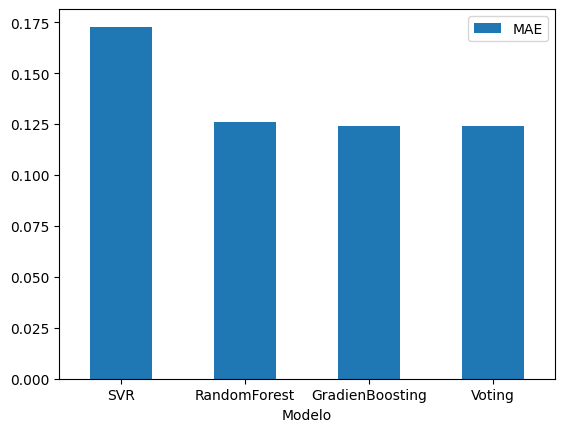

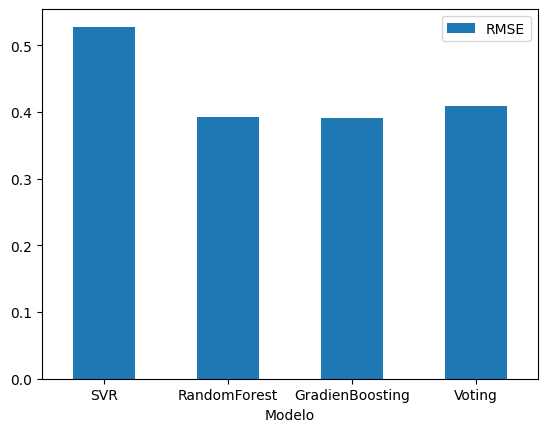

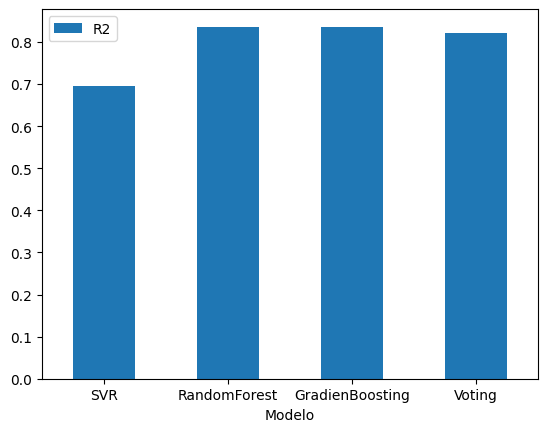

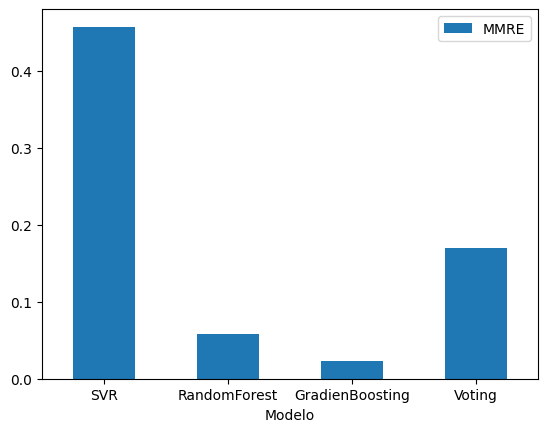

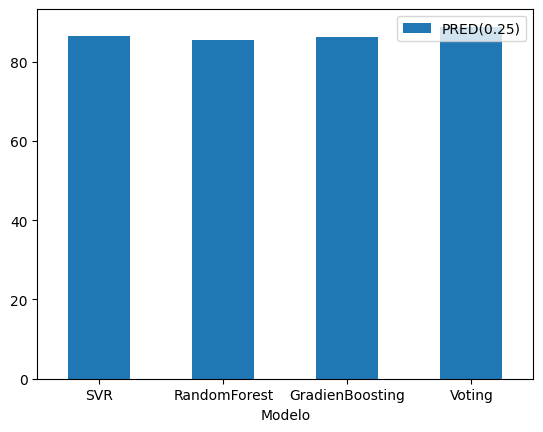

In [ ]:
variables=list(score_result)
variables.pop(0)

for var in variables:
  score_result.plot.bar(x='Modelo', y=var, rot=0)